In [1]:
#import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Set visualization theme
sns.set()

In [2]:
#import dataset
data = pd.read_csv('Jewelry_Dataset.csv')

In [3]:
data.head()

,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1806829201890738522,jewelry.earring,0,561.51,1515915625207851155,Unnamed: 9,red,gold,diamond
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [4]:
#assign features to the dataset

data.columns = ['Order_datetime',
 'Order_ID',
 'Product_ID',
 'SKU_Quantoty',
 'Category_ID',
 'Category_alias',
 'Brand_ID',
 'Price_in_USD',
 'User_ID',
 'Target_gender',
 'Main_Color',
 'Main_metal',
 'Main_gem']

In [5]:
data.head()

,Order_datetime,Order_ID,Product_ID,SKU_Quantoty,Category_ID,Category_alias,Brand_ID,Price_in_USD,User_ID,Target_gender,Main_Color,Main_metal,Main_gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [6]:
#missing data
data.isnull().sum()

Order_datetime        0
Order_ID              0
Product_ID            0
SKU_Quantoty          0
Category_ID        5352
Category_alias     9933
Brand_ID           4785
Price_in_USD       5352
User_ID            5352
Target_gender     48167
Main_Color         7660
Main_metal         5462
Main_gem          34058
dtype: int64

In [7]:
#data shape
data.shape

(95910, 13)

In [8]:
#feature cardinality
data.nunique()

Order_datetime    74504
Order_ID          74759
Product_ID         9613
SKU_Quantoty          1
Category_ID          25
Category_alias      218
Brand_ID           2537
Price_in_USD       3166
User_ID           31079
Target_gender         2
Main_Color            5
Main_metal            3
Main_gem             30
dtype: int64

In [9]:
#data descrription
data.describe()

,Order_ID,Product_ID,SKU_Quantoty,Category_ID,Brand_ID,Price_in_USD,User_ID
count,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,9.112500e+04,90558.000000,9.055800e+04
mean,2.485191e+18,1.815970e+18,1.0,1.805947e+18,8.891036e+16,362.213017,1.512644e+18
std,1.934750e+17,2.136814e+17,0.0,2.083954e+16,3.559651e+17,444.157665,2.374776e+16
min,1.924899e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379732e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524282e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


In [10]:
#data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_datetime  95910 non-null  object 
 1   Order_ID        95910 non-null  int64  
 2   Product_ID      95910 non-null  int64  
 3   SKU_Quantoty    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category_alias  85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_in_USD    90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Target_gender   47743 non-null  object 
 10  Main_Color      88250 non-null  object 
 11  Main_metal      90448 non-null  object 
 12  Main_gem        61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [11]:
#duplicate values check
duplicate_num = len(data.loc[data.duplicated()])

In [12]:
print(f"Total number of duplicate values in the dataset:",duplicate_num)

Total number of duplicate values in the dataset: 2589


In [13]:
#Features with a cardinality of 1
invariant_features = data.nunique()[data.nunique()==1].index.tolist()

In [14]:
invariant_features

['SKU_Quantoty']

In [15]:
#Check for label distribution
data['Price_in_USD'].skew()

18.95906072625981

In [16]:
data['Price_in_USD'].kurtosis()

1054.8979068506155

Text(0, 0.5, 'Price Frequency')

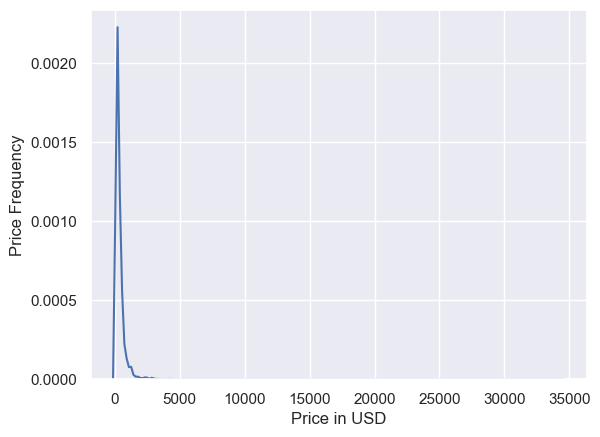

In [17]:
#Visualize price distribution

sns.kdeplot(data,x='Price_in_USD')

plt.xlabel('Price in USD')
plt.ylabel('Price Frequency')

In [18]:
#Target gender analysis

data['Target_gender'].value_counts()

Target_gender
f    47379
m      364
Name: count, dtype: int64

In [19]:
data['Target_gender'].value_counts(normalize=True)

Target_gender
f    0.992376
m    0.007624
Name: proportion, dtype: float64

Text(0, 0.5, 'Gender Subopulation')

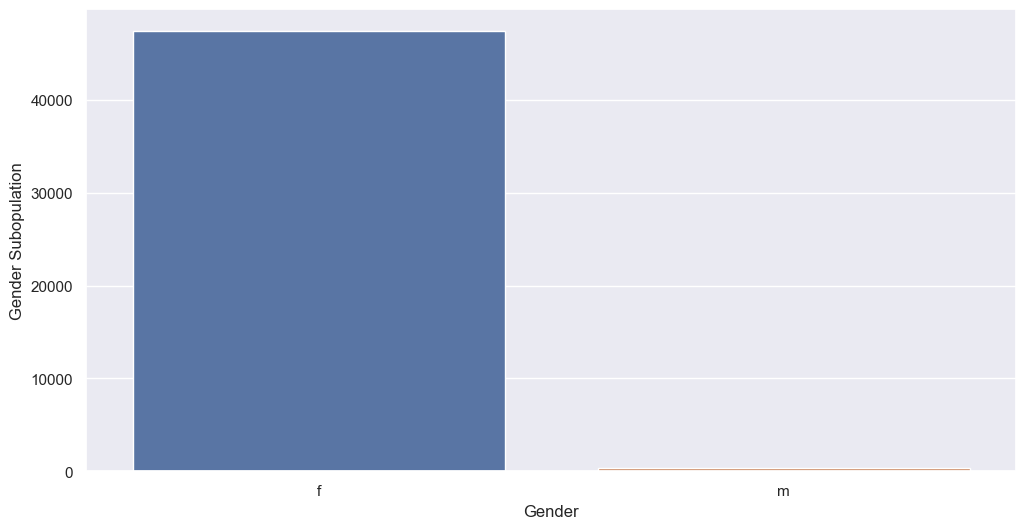

In [20]:
#visualze target gender
plt.figure(figsize=(12,6))

sns.countplot(data,x='Target_gender')

plt.xlabel('Gender')
plt.ylabel('Gender Subopulation')

In [21]:
data['Category_alias'].value_counts()

Category_alias
jewelry.earring     29051
jewelry.ring        28300
jewelry.pendant     13088
jewelry.bracelet     6188
0.00                 4392
                    ...  
626.58                  1
13.42                   1
2.88                    1
101.23                  1
253.77                  1
Name: count, Length: 218, dtype: int64

In [22]:
data['Category_alias'].unique()

array([nan, 'jewelry.pendant', 'jewelry.necklace', 'jewelry.earring',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.90', '380.10', '357.49', '15.47', '135.33',
       '719.75', '93.01', '177.95', 'jewelry.stud', '102.10', '595.75',
       '469.56', '427.07', '53.62', '77.53', '1469.18', '355.27',
       '184.89', '154.66', '300.58', '83.73', '271.19', '3294.21',
       '278.04', '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22',
       '124.88', '89.73', '171.23', '136.93', '19.04', '158.77', '187.10',
       '151.92', '1845.89', '87.23', '248.58', '596.48', '208.88',
       '193.11', '169.84', '1447.68', '45.07', '136.85', '282.05',
       '61.51', '210.21', '137.12'

In [23]:
categories = data['Category_alias'].unique().tolist()
categories = [c for c in categories if isinstance(c, str) and 'jewelry' in c]

In [24]:
categories

['jewelry.pendant',
 'jewelry.necklace',
 'jewelry.earring',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

In [25]:
real_categories = data.loc[data['Category_alias'].isin(categories)]

In [26]:
# percentage of missing data

100 * data.isnull().sum()/len(data)

Order_datetime     0.000000
Order_ID           0.000000
Product_ID         0.000000
SKU_Quantoty       0.000000
Category_ID        5.580231
Category_alias    10.356584
Brand_ID           4.989052
Price_in_USD       5.580231
User_ID            5.580231
Target_gender     50.221041
Main_Color         7.986654
Main_metal         5.694922
Main_gem          35.510374
dtype: float64

In [27]:
# percentage of missing data (Category)

100 * real_categories.isnull().sum()/len(real_categories)

Order_datetime     0.000000
Order_ID           0.000000
Product_ID         0.000000
SKU_Quantoty       0.000000
Category_ID        0.000000
Category_alias     0.000000
Brand_ID           4.309081
Price_in_USD       0.000000
User_ID            0.000000
Target_gender     44.842029
Main_Color         2.656044
Main_metal         0.110617
Main_gem          24.232519
dtype: float64

([<matplotlib.patches.Wedge at 0x2076fc26850>,
 [Text(0.46500770079861636, 0.9968790489312055, 'jewelry.earring'),
  Text(-1.070506181843632, -0.25301485062060797, 'jewelry.ring'),
  Text(0.3011847396871426, -1.0579639656337962, 'jewelry.pendant'),
  Text(0.9430311863538345, -0.5662969023083911, 'jewelry.bracelet'),
  Text(1.0765205012519667, -0.22606107666782124, 'jewelry.necklace'),
  Text(1.0977123241793836, -0.07090594717438166, 'jewelry.brooch'),
  Text(1.0999684402337844, -0.008332496003938419, 'jewelry.souvenir'),
  Text(1.0999998792123364, -0.0005154928180492206, 'jewelry.stud')])

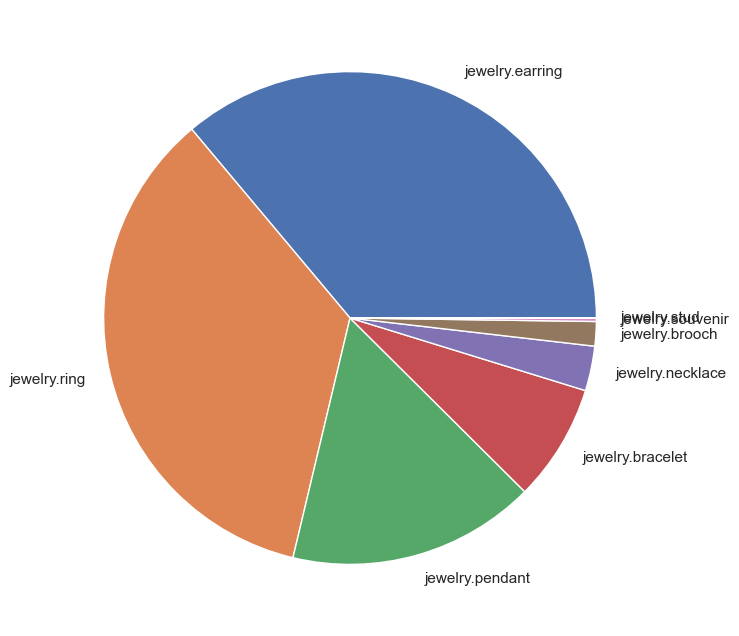

In [28]:
subdata = real_categories['Category_alias'].value_counts()

jewelry_categories, count = subdata.index.tolist(), subdata.values.tolist()

plt.figure(figsize = (8,8))
plt.pie(x=count, labels=jewelry_categories)

<Axes: xlabel='Category_alias', ylabel='count'>

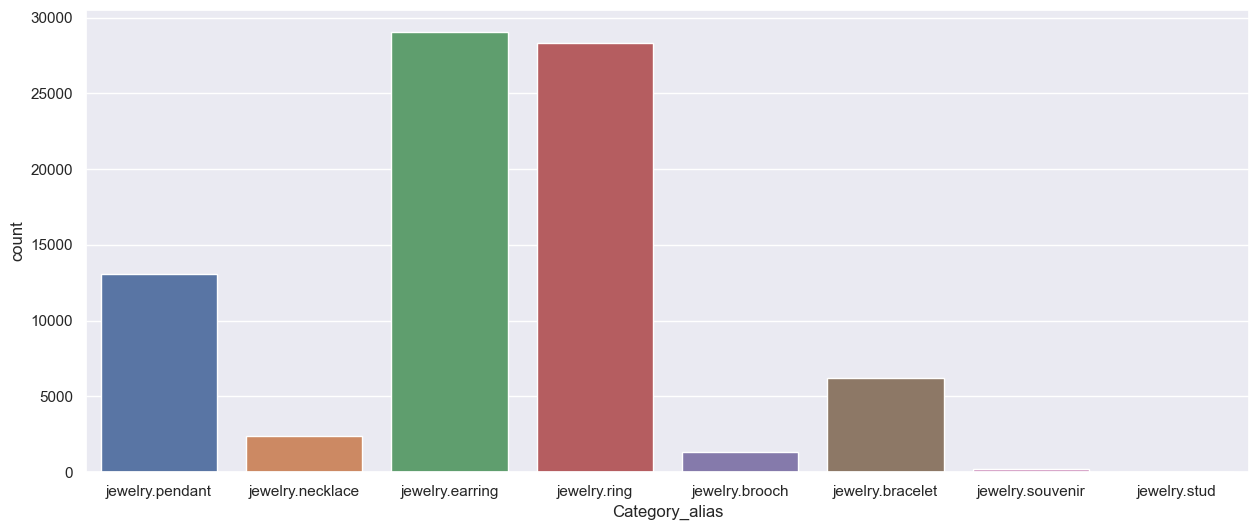

In [29]:
# Visualize Category count

plt.figure(figsize=(15,6))
sns.countplot(real_categories,x='Category_alias')

<Axes: xlabel='Category_alias', ylabel='count'>

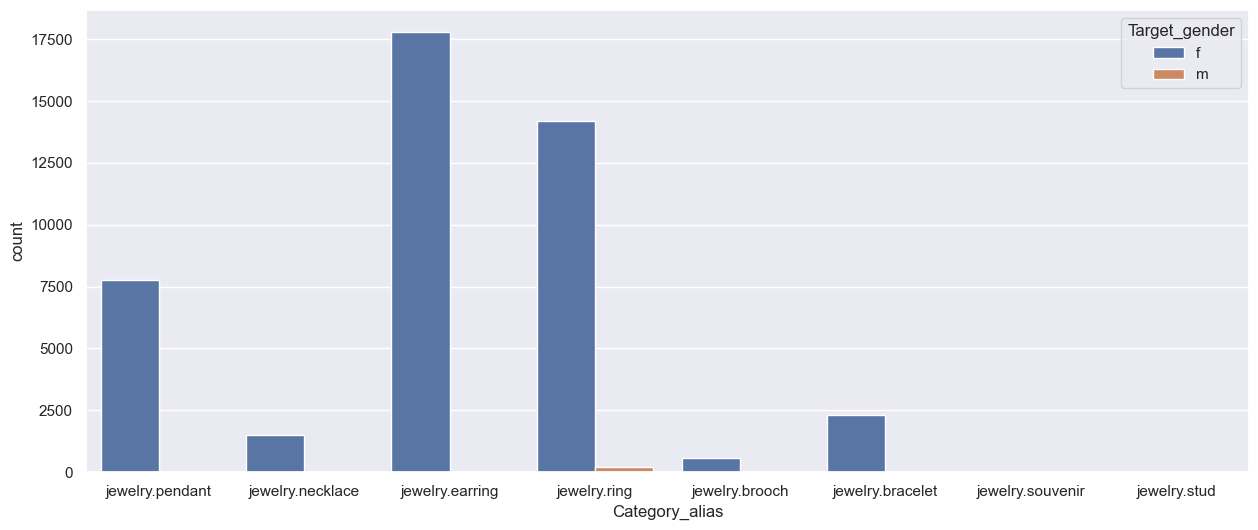

In [30]:
# Visualize Category count with gender as a seperator

plt.figure(figsize=(15,6))
sns.countplot(real_categories,x='Category_alias', hue='Target_gender')

In [31]:
#Gender skew in original data

data['Target_gender'].value_counts(normalize=True)

Target_gender
f    0.992376
m    0.007624
Name: proportion, dtype: float64

In [32]:
#Gender skew in real categories

real_categories['Target_gender'].value_counts(normalize=True)

Target_gender
f    0.994434
m    0.005566
Name: proportion, dtype: float64

In [33]:
encoded, category_code = pd.factorize(real_categories['Category_alias'])
real_categories.loc[:,'Category_alias'] = encoded

In [34]:
encoded, category_code = pd.factorize(real_categories['Target_gender'])
real_categories.loc[:,'Target_gender'] = encoded

In [35]:
encoded, category_code = pd.factorize(real_categories['Main_gem'])
real_categories.loc[:,'Main_gem'] = encoded

In [36]:
encoded, category_code = pd.factorize(real_categories['Main_Color'])
real_categories.loc[:,'Main_Color'] = encoded

In [37]:
encoded, category_code = pd.factorize(real_categories['Main_metal'])
real_categories.loc[:,'Main_metal'] = encoded

In [38]:
real_categories.head()

,Order_datetime,Order_ID,Product_ID,SKU_Quantoty,Category_ID,Category_alias,Brand_ID,Price_in_USD,User_ID,Target_gender,Main_Color,Main_metal,Main_gem
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,0,1.0,54.66,1.515916e+18,0,0,0,0
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,0,0.0,88.90,1.515916e+18,0,1,0,1
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,1,0.0,417.67,1.515916e+18,-1,1,0,2
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,2,1.0,102.27,1.515916e+18,-1,1,0,-1
5,2018-12-02 22:09:34 UTC,1925760595336888995,1600021442638905547,1,1.806829e+18,2,0.0,150.55,1.515916e+18,-1,1,0,1


In [39]:
correlations = real_categories.drop(labels= ['Order_datetime', 'Order_ID','User_ID','Product_ID'], axis=1).corr(method='spearman')

In [40]:
correlations

,SKU_Quantoty,Category_ID,Category_alias,Brand_ID,Price_in_USD,Target_gender,Main_Color,Main_metal,Main_gem
SKU_Quantoty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,NaN,1.000000,-0.886212,0.111328,-0.296495,0.106286,0.003396,0.157834,0.050483
Category_alias,NaN,-0.886212,1.000000,-0.111680,0.267257,-0.124101,-0.059402,0.105056,-0.082944
Brand_ID,NaN,0.111328,-0.111680,1.000000,-0.018428,0.623701,0.100816,0.003835,0.076277
Price_in_USD,NaN,-0.296495,0.267257,-0.018428,1.000000,0.049532,0.013177,-0.173050,-0.006630
Target_gender,NaN,0.106286,-0.124101,0.623701,0.049532,1.000000,0.056950,-0.046436,0.166125
Main_Color,NaN,0.003396,-0.059402,0.100816,0.013177,0.056950,1.000000,-0.238080,0.136232
Main_metal,NaN,0.157834,0.105056,0.003835,-0.173050,-0.046436,-0.238080,1.000000,-0.055603
Main_gem,NaN,0.050483,-0.082944,0.076277,-0.006630,0.166125,0.136232,-0.055603,1.000000


<Axes: >

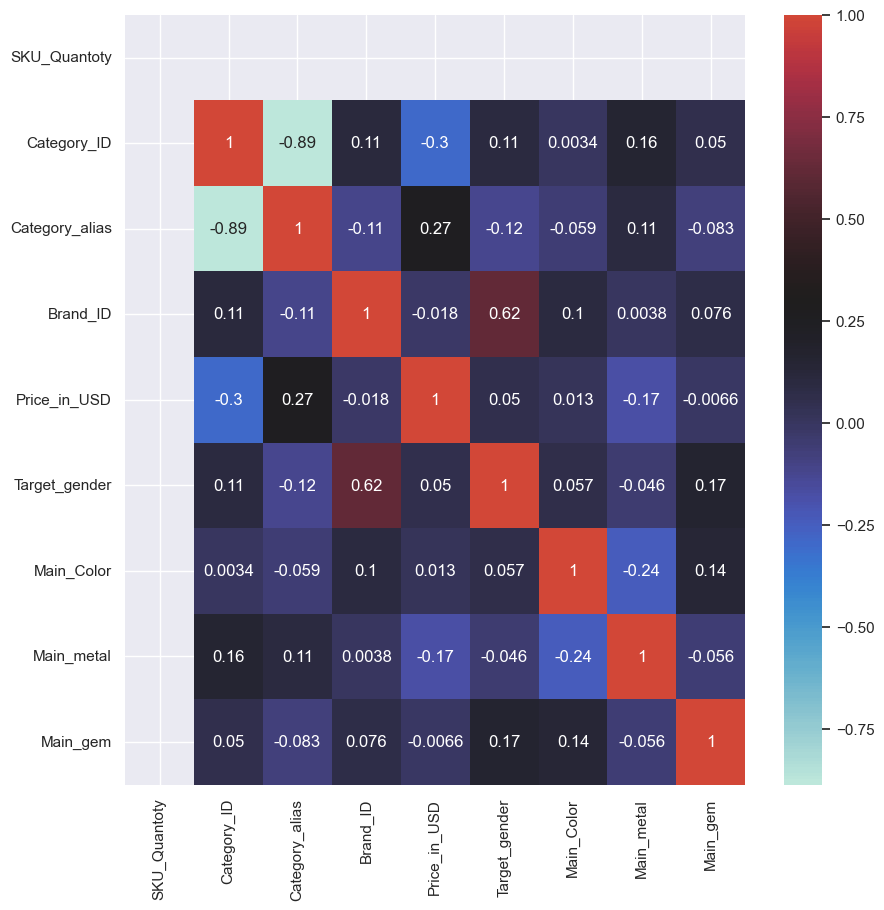

In [41]:
plt.figure(figsize=(10,10))

sns.heatmap(correlations,annot=True,center=.3)

In [42]:
#Set Correlation Limit

upper = .1
lower = .2


In [43]:
correlated_columns = {
    column: correlations[(correlations[column] > lower) & (upper < correlations[column])].index.tolist()
    for column in correlations.columns
}

In [44]:
correlated_columns

{'SKU_Quantoty': [],
 'Category_ID': ['Category_ID'],
 'Category_alias': ['Category_alias', 'Price_in_USD'],
 'Brand_ID': ['Brand_ID', 'Target_gender'],
 'Price_in_USD': ['Category_alias', 'Price_in_USD'],
 'Target_gender': ['Brand_ID', 'Target_gender'],
 'Main_Color': ['Main_Color'],
 'Main_metal': ['Main_metal'],
 'Main_gem': ['Main_gem']}

## Implications from EDA

1. Missing Values
2. Data Corruption
3. Rare values
4. Low Cardinality or feature invariance
5. Target Skew
6. Correlation


# Data Preparation

How we prepare the data

1. Eliminate useless features
2. Extract records with actual catergories
3. Encode categorical features
4. Account for target skew
5. Fix missing values

In [45]:
# Eliminate usless features

columns_to_eliminate = ['SKU_Quantoty','Order_ID','Product_ID','User_ID','Category_ID']

In [46]:
data.drop(labels=columns_to_eliminate,axis=1, inplace=True)

In [47]:
data.shape

(95910, 8)

In [48]:
data.drop('Order_datetime', axis=1, inplace=True)

In [49]:
data = data.loc[data['Category_alias'].isin(categories), :]

In [50]:
data.shape

(80458, 7)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = data.drop('Price_in_USD',axis=1)
y = data['Price_in_USD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## DATA MODELLING

In [53]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import TransformedTargetRegressor, ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline

In [54]:
def generate_pipeline(model,column_indices,categorical_indices,fill_missing=True,one_hot=True,label_encode=False):
    first_transformer = ColumnTransformer(
        transformers = [
            ("imputer", SimpleImputer(strategy="most_frequent"), column_indices)
        ],
        remainder= 'passthrough',
        sparse_threshold = 0.
    )
    
    second_transformer =  ColumnTransformer(
        transformers = [
            ("one_hot", OneHotEncoder(), categorical_indices)
        ],
        remainder= 'passthrough',
        sparse_threshold = 0.
    )
    
    third_transformer =  ColumnTransformer(
        transformers = [
            ("ordinal", OrdinalEncoder(), categorical_indices)
        ],
        remainder= 'passthrough',
        sparse_threshold = 0.
    )
    
    steps = []
    
    if fill_missing:
        steps.append(('first',first_transformer))
    
    if label_encode:
        steps.append(('third',third_transformer))
    
    if one_hot:
        steps.append(('second',second_transformer))
    
    steps.append(('model', model))
    
    model_pipe = Pipeline(steps = steps)
    
    return model_pipe

In [55]:
X.head()

,Category_alias,Brand_ID,Target_gender,Main_Color,Main_metal,Main_gem
1,jewelry.pendant,1.0,f,white,gold,sapphire
2,jewelry.pendant,0.0,f,red,gold,diamond
3,jewelry.necklace,0.0,NaN,red,gold,amethyst
4,jewelry.earring,1.0,NaN,red,gold,NaN
5,jewelry.earring,0.0,NaN,red,gold,diamond


In [56]:
columns = X.columns.tolist()

column_indices = [columns.index(c) for c in columns]
categorical_features = [c for c in columns if c not in ['Brand_ID']]
categorical_indices = [columns.index(c) for c in categorical_features]

In [57]:
categorical_indices

[0, 2, 3, 4, 5]

In [58]:
cat_pipe = generate_pipeline(
    CatBoostRegressor(loss_function='RMSE', iterations = 10000, learning_rate=0.1, one_hot_max_size=2),
    column_indices,
    categorical_indices,
    fill_missing=False,
    one_hot=False,
    label_encode=True
)

In [59]:
linreg_pipe = generate_pipeline(
    LinearRegression(),
    column_indices,
    categorical_indices,
    fill_missing=True,
    one_hot=True,
    label_encode=False
)

In [60]:
ada_pipe = generate_pipeline(
    AdaBoostRegressor(loss='exponential',n_estimators=1000,learning_rate=0.01),
    column_indices,
    categorical_indices,
    fill_missing=True,
    one_hot=True,
    label_encode=False
)

In [61]:
extra_pipe = generate_pipeline(
    ExtraTreesRegressor(criterion='friedman_mse',n_estimators=1000, bootstrap=True),
    column_indices,
    categorical_indices,
    fill_missing=True,
    one_hot=True,
    label_encode=False
)

In [62]:
from sklearn.preprocessing import PowerTransformer

In [63]:
cat_pipe = TransformedTargetRegressor(regressor= cat_pipe,transformer=PowerTransformer(method='box-cox'))
linreg_pipe = TransformedTargetRegressor(regressor= linreg_pipe,transformer=PowerTransformer(method='box-cox'))
ada_pipe = TransformedTargetRegressor(regressor=ada_pipe,transformer=PowerTransformer(method='box-cox'))
extra_pipe = TransformedTargetRegressor(regressor= extra_pipe,transformer=PowerTransformer(method='box-cox'))

In [64]:
cat_pipe.fit(X_train,y_train)

0:	learn: 0.9627785	total: 292ms	remaining: 48m 38s
1:	learn: 0.9244262	total: 327ms	remaining: 27m 14s
2:	learn: 0.8976099	total: 349ms	remaining: 19m 22s
3:	learn: 0.8699899	total: 374ms	remaining: 15m 35s
4:	learn: 0.8502063	total: 395ms	remaining: 13m 8s
5:	learn: 0.8286793	total: 416ms	remaining: 11m 33s
6:	learn: 0.8139394	total: 436ms	remaining: 10m 22s
7:	learn: 0.7988901	total: 472ms	remaining: 9m 49s
8:	learn: 0.7887958	total: 547ms	remaining: 10m 6s
9:	learn: 0.7791408	total: 582ms	remaining: 9m 41s
10:	learn: 0.7686237	total: 607ms	remaining: 9m 11s
11:	learn: 0.7607528	total: 630ms	remaining: 8m 44s
12:	learn: 0.7543461	total: 650ms	remaining: 8m 19s
13:	learn: 0.7490710	total: 670ms	remaining: 7m 58s
14:	learn: 0.7415056	total: 692ms	remaining: 7m 40s
15:	learn: 0.7373550	total: 713ms	remaining: 7m 24s
16:	learn: 0.7337885	total: 733ms	remaining: 7m 10s
17:	learn: 0.7276826	total: 759ms	remaining: 7m
18:	learn: 0.7242957	total: 797ms	remaining: 6m 58s
19:	learn: 0.7192198

159:	learn: 0.6444127	total: 4.08s	remaining: 4m 10s
160:	learn: 0.6443283	total: 4.12s	remaining: 4m 11s
161:	learn: 0.6440849	total: 4.14s	remaining: 4m 11s
162:	learn: 0.6438910	total: 4.16s	remaining: 4m 11s
163:	learn: 0.6438328	total: 4.18s	remaining: 4m 10s
164:	learn: 0.6436614	total: 4.2s	remaining: 4m 10s
165:	learn: 0.6435394	total: 4.22s	remaining: 4m 10s
166:	learn: 0.6433707	total: 4.24s	remaining: 4m 9s
167:	learn: 0.6432685	total: 4.26s	remaining: 4m 9s
168:	learn: 0.6430953	total: 4.28s	remaining: 4m 9s
169:	learn: 0.6428783	total: 4.31s	remaining: 4m 9s
170:	learn: 0.6428144	total: 4.33s	remaining: 4m 9s
171:	learn: 0.6427346	total: 4.36s	remaining: 4m 8s
172:	learn: 0.6425787	total: 4.38s	remaining: 4m 8s
173:	learn: 0.6424436	total: 4.4s	remaining: 4m 8s
174:	learn: 0.6423635	total: 4.42s	remaining: 4m 8s
175:	learn: 0.6423129	total: 4.44s	remaining: 4m 7s
176:	learn: 0.6421422	total: 4.46s	remaining: 4m 7s
177:	learn: 0.6420245	total: 4.48s	remaining: 4m 7s
178:	le

317:	learn: 0.6309255	total: 7.66s	remaining: 3m 53s
318:	learn: 0.6308936	total: 7.69s	remaining: 3m 53s
319:	learn: 0.6308903	total: 7.71s	remaining: 3m 53s
320:	learn: 0.6307618	total: 7.73s	remaining: 3m 53s
321:	learn: 0.6306978	total: 7.75s	remaining: 3m 52s
322:	learn: 0.6306812	total: 7.77s	remaining: 3m 52s
323:	learn: 0.6306132	total: 7.79s	remaining: 3m 52s
324:	learn: 0.6305256	total: 7.81s	remaining: 3m 52s
325:	learn: 0.6304744	total: 7.83s	remaining: 3m 52s
326:	learn: 0.6303727	total: 7.86s	remaining: 3m 52s
327:	learn: 0.6303179	total: 7.88s	remaining: 3m 52s
328:	learn: 0.6302506	total: 7.91s	remaining: 3m 52s
329:	learn: 0.6302220	total: 7.93s	remaining: 3m 52s
330:	learn: 0.6301798	total: 7.96s	remaining: 3m 52s
331:	learn: 0.6301376	total: 7.98s	remaining: 3m 52s
332:	learn: 0.6300960	total: 8s	remaining: 3m 52s
333:	learn: 0.6300553	total: 8.02s	remaining: 3m 52s
334:	learn: 0.6300361	total: 8.04s	remaining: 3m 51s
335:	learn: 0.6300021	total: 8.06s	remaining: 3m 

475:	learn: 0.6253446	total: 11.1s	remaining: 3m 42s
476:	learn: 0.6253261	total: 11.2s	remaining: 3m 42s
477:	learn: 0.6253261	total: 11.2s	remaining: 3m 42s
478:	learn: 0.6253057	total: 11.2s	remaining: 3m 42s
479:	learn: 0.6252991	total: 11.2s	remaining: 3m 42s
480:	learn: 0.6252713	total: 11.2s	remaining: 3m 42s
481:	learn: 0.6252407	total: 11.3s	remaining: 3m 42s
482:	learn: 0.6252341	total: 11.3s	remaining: 3m 42s
483:	learn: 0.6251980	total: 11.3s	remaining: 3m 42s
484:	learn: 0.6251780	total: 11.3s	remaining: 3m 42s
485:	learn: 0.6251673	total: 11.4s	remaining: 3m 42s
486:	learn: 0.6251237	total: 11.4s	remaining: 3m 42s
487:	learn: 0.6251116	total: 11.4s	remaining: 3m 42s
488:	learn: 0.6250511	total: 11.4s	remaining: 3m 42s
489:	learn: 0.6249937	total: 11.5s	remaining: 3m 42s
490:	learn: 0.6249649	total: 11.5s	remaining: 3m 42s
491:	learn: 0.6249577	total: 11.5s	remaining: 3m 42s
492:	learn: 0.6249138	total: 11.5s	remaining: 3m 42s
493:	learn: 0.6248538	total: 11.5s	remaining: 

639:	learn: 0.6219489	total: 14.8s	remaining: 3m 36s
640:	learn: 0.6219489	total: 14.9s	remaining: 3m 36s
641:	learn: 0.6219361	total: 14.9s	remaining: 3m 36s
642:	learn: 0.6219315	total: 14.9s	remaining: 3m 36s
643:	learn: 0.6218916	total: 14.9s	remaining: 3m 36s
644:	learn: 0.6218825	total: 14.9s	remaining: 3m 36s
645:	learn: 0.6218581	total: 15s	remaining: 3m 36s
646:	learn: 0.6218482	total: 15s	remaining: 3m 36s
647:	learn: 0.6218336	total: 15s	remaining: 3m 36s
648:	learn: 0.6218113	total: 15s	remaining: 3m 36s
649:	learn: 0.6217971	total: 15.1s	remaining: 3m 36s
650:	learn: 0.6217564	total: 15.1s	remaining: 3m 36s
651:	learn: 0.6217470	total: 15.1s	remaining: 3m 36s
652:	learn: 0.6217260	total: 15.1s	remaining: 3m 36s
653:	learn: 0.6216791	total: 15.1s	remaining: 3m 36s
654:	learn: 0.6216722	total: 15.2s	remaining: 3m 36s
655:	learn: 0.6216665	total: 15.2s	remaining: 3m 36s
656:	learn: 0.6216649	total: 15.2s	remaining: 3m 36s
657:	learn: 0.6216465	total: 15.2s	remaining: 3m 36s
6

802:	learn: 0.6201022	total: 18.9s	remaining: 3m 36s
803:	learn: 0.6200975	total: 19s	remaining: 3m 36s
804:	learn: 0.6200921	total: 19s	remaining: 3m 36s
805:	learn: 0.6200639	total: 19s	remaining: 3m 37s
806:	learn: 0.6200594	total: 19.1s	remaining: 3m 37s
807:	learn: 0.6200576	total: 19.1s	remaining: 3m 37s
808:	learn: 0.6200554	total: 19.1s	remaining: 3m 37s
809:	learn: 0.6200534	total: 19.2s	remaining: 3m 37s
810:	learn: 0.6200417	total: 19.2s	remaining: 3m 37s
811:	learn: 0.6200417	total: 19.2s	remaining: 3m 37s
812:	learn: 0.6200248	total: 19.3s	remaining: 3m 37s
813:	learn: 0.6200203	total: 19.3s	remaining: 3m 37s
814:	learn: 0.6200042	total: 19.3s	remaining: 3m 37s
815:	learn: 0.6199987	total: 19.3s	remaining: 3m 37s
816:	learn: 0.6199810	total: 19.4s	remaining: 3m 37s
817:	learn: 0.6199714	total: 19.4s	remaining: 3m 38s
818:	learn: 0.6199687	total: 19.5s	remaining: 3m 38s
819:	learn: 0.6199587	total: 19.5s	remaining: 3m 38s
820:	learn: 0.6199531	total: 19.5s	remaining: 3m 38s

960:	learn: 0.6190532	total: 24.5s	remaining: 3m 50s
961:	learn: 0.6190508	total: 24.6s	remaining: 3m 50s
962:	learn: 0.6190378	total: 24.6s	remaining: 3m 51s
963:	learn: 0.6190371	total: 24.6s	remaining: 3m 51s
964:	learn: 0.6190255	total: 24.7s	remaining: 3m 51s
965:	learn: 0.6190241	total: 24.7s	remaining: 3m 51s
966:	learn: 0.6190144	total: 24.8s	remaining: 3m 51s
967:	learn: 0.6190130	total: 24.8s	remaining: 3m 51s
968:	learn: 0.6190112	total: 24.8s	remaining: 3m 51s
969:	learn: 0.6190076	total: 24.9s	remaining: 3m 51s
970:	learn: 0.6189938	total: 24.9s	remaining: 3m 51s
971:	learn: 0.6189695	total: 24.9s	remaining: 3m 51s
972:	learn: 0.6189361	total: 25s	remaining: 3m 51s
973:	learn: 0.6189341	total: 25s	remaining: 3m 52s
974:	learn: 0.6189315	total: 25.1s	remaining: 3m 52s
975:	learn: 0.6189040	total: 25.1s	remaining: 3m 52s
976:	learn: 0.6189040	total: 25.1s	remaining: 3m 51s
977:	learn: 0.6188890	total: 25.2s	remaining: 3m 52s
978:	learn: 0.6188857	total: 25.2s	remaining: 3m 5

1116:	learn: 0.6182436	total: 30s	remaining: 3m 58s
1117:	learn: 0.6182406	total: 30.1s	remaining: 3m 58s
1118:	learn: 0.6182378	total: 30.1s	remaining: 3m 58s
1119:	learn: 0.6182257	total: 30.1s	remaining: 3m 59s
1120:	learn: 0.6182128	total: 30.2s	remaining: 3m 59s
1121:	learn: 0.6182124	total: 30.2s	remaining: 3m 59s
1122:	learn: 0.6182095	total: 30.3s	remaining: 3m 59s
1123:	learn: 0.6182031	total: 30.3s	remaining: 3m 59s
1124:	learn: 0.6182013	total: 30.3s	remaining: 3m 59s
1125:	learn: 0.6181986	total: 30.4s	remaining: 3m 59s
1126:	learn: 0.6181944	total: 30.4s	remaining: 3m 59s
1127:	learn: 0.6181710	total: 30.4s	remaining: 3m 59s
1128:	learn: 0.6181693	total: 30.5s	remaining: 3m 59s
1129:	learn: 0.6181675	total: 30.5s	remaining: 3m 59s
1130:	learn: 0.6181648	total: 30.5s	remaining: 3m 59s
1131:	learn: 0.6181581	total: 30.6s	remaining: 3m 59s
1132:	learn: 0.6181569	total: 30.6s	remaining: 3m 59s
1133:	learn: 0.6181488	total: 30.6s	remaining: 3m 59s
1134:	learn: 0.6181479	total: 

1278:	learn: 0.6176616	total: 35.9s	remaining: 4m 4s
1279:	learn: 0.6176569	total: 35.9s	remaining: 4m 4s
1280:	learn: 0.6176552	total: 36s	remaining: 4m 4s
1281:	learn: 0.6176541	total: 36s	remaining: 4m 4s
1282:	learn: 0.6176534	total: 36s	remaining: 4m 4s
1283:	learn: 0.6176491	total: 36.1s	remaining: 4m 4s
1284:	learn: 0.6176475	total: 36.1s	remaining: 4m 4s
1285:	learn: 0.6176427	total: 36.2s	remaining: 4m 5s
1286:	learn: 0.6176374	total: 36.2s	remaining: 4m 5s
1287:	learn: 0.6176345	total: 36.2s	remaining: 4m 5s
1288:	learn: 0.6176342	total: 36.3s	remaining: 4m 5s
1289:	learn: 0.6176326	total: 36.3s	remaining: 4m 5s
1290:	learn: 0.6176322	total: 36.3s	remaining: 4m 5s
1291:	learn: 0.6176248	total: 36.4s	remaining: 4m 5s
1292:	learn: 0.6176232	total: 36.4s	remaining: 4m 5s
1293:	learn: 0.6176201	total: 36.4s	remaining: 4m 5s
1294:	learn: 0.6176104	total: 36.5s	remaining: 4m 5s
1295:	learn: 0.6176096	total: 36.5s	remaining: 4m 5s
1296:	learn: 0.6176077	total: 36.6s	remaining: 4m 5s

1435:	learn: 0.6172360	total: 42.3s	remaining: 4m 12s
1436:	learn: 0.6172342	total: 42.4s	remaining: 4m 12s
1437:	learn: 0.6172342	total: 42.4s	remaining: 4m 12s
1438:	learn: 0.6172328	total: 42.5s	remaining: 4m 12s
1439:	learn: 0.6172325	total: 42.5s	remaining: 4m 12s
1440:	learn: 0.6172303	total: 42.6s	remaining: 4m 12s
1441:	learn: 0.6172301	total: 42.6s	remaining: 4m 12s
1442:	learn: 0.6172288	total: 42.7s	remaining: 4m 12s
1443:	learn: 0.6172279	total: 42.7s	remaining: 4m 12s
1444:	learn: 0.6172271	total: 42.7s	remaining: 4m 13s
1445:	learn: 0.6172267	total: 42.8s	remaining: 4m 13s
1446:	learn: 0.6172248	total: 42.9s	remaining: 4m 13s
1447:	learn: 0.6172172	total: 42.9s	remaining: 4m 13s
1448:	learn: 0.6172172	total: 43s	remaining: 4m 13s
1449:	learn: 0.6172109	total: 43.1s	remaining: 4m 14s
1450:	learn: 0.6172093	total: 43.2s	remaining: 4m 14s
1451:	learn: 0.6172086	total: 43.4s	remaining: 4m 15s
1452:	learn: 0.6172050	total: 43.6s	remaining: 4m 16s
1453:	learn: 0.6172026	total: 

1591:	learn: 0.6169430	total: 51.6s	remaining: 4m 32s
1592:	learn: 0.6169426	total: 51.6s	remaining: 4m 32s
1593:	learn: 0.6169422	total: 51.7s	remaining: 4m 32s
1594:	learn: 0.6169412	total: 51.7s	remaining: 4m 32s
1595:	learn: 0.6169398	total: 51.7s	remaining: 4m 32s
1596:	learn: 0.6169384	total: 51.8s	remaining: 4m 32s
1597:	learn: 0.6169377	total: 51.8s	remaining: 4m 32s
1598:	learn: 0.6169372	total: 51.8s	remaining: 4m 32s
1599:	learn: 0.6169364	total: 51.9s	remaining: 4m 32s
1600:	learn: 0.6169347	total: 51.9s	remaining: 4m 32s
1601:	learn: 0.6169330	total: 51.9s	remaining: 4m 32s
1602:	learn: 0.6169328	total: 52s	remaining: 4m 32s
1603:	learn: 0.6169310	total: 52s	remaining: 4m 32s
1604:	learn: 0.6169294	total: 52s	remaining: 4m 32s
1605:	learn: 0.6169225	total: 52.1s	remaining: 4m 32s
1606:	learn: 0.6169202	total: 52.1s	remaining: 4m 32s
1607:	learn: 0.6169179	total: 52.2s	remaining: 4m 32s
1608:	learn: 0.6169160	total: 52.2s	remaining: 4m 32s
1609:	learn: 0.6169116	total: 52.2

1746:	learn: 0.6167126	total: 57s	remaining: 4m 29s
1747:	learn: 0.6167126	total: 57s	remaining: 4m 28s
1748:	learn: 0.6167089	total: 57s	remaining: 4m 28s
1749:	learn: 0.6167049	total: 57s	remaining: 4m 28s
1750:	learn: 0.6167044	total: 57.1s	remaining: 4m 28s
1751:	learn: 0.6167034	total: 57.1s	remaining: 4m 28s
1752:	learn: 0.6167010	total: 57.1s	remaining: 4m 28s
1753:	learn: 0.6167005	total: 57.2s	remaining: 4m 28s
1754:	learn: 0.6166994	total: 57.2s	remaining: 4m 28s
1755:	learn: 0.6166970	total: 57.3s	remaining: 4m 28s
1756:	learn: 0.6166938	total: 57.3s	remaining: 4m 28s
1757:	learn: 0.6166931	total: 57.3s	remaining: 4m 28s
1758:	learn: 0.6166926	total: 57.4s	remaining: 4m 28s
1759:	learn: 0.6166906	total: 57.4s	remaining: 4m 28s
1760:	learn: 0.6166882	total: 57.5s	remaining: 4m 28s
1761:	learn: 0.6166846	total: 57.5s	remaining: 4m 28s
1762:	learn: 0.6166829	total: 57.5s	remaining: 4m 28s
1763:	learn: 0.6166811	total: 57.6s	remaining: 4m 28s
1764:	learn: 0.6166797	total: 57.6s	

1903:	learn: 0.6164813	total: 1m 2s	remaining: 4m 25s
1904:	learn: 0.6164806	total: 1m 2s	remaining: 4m 25s
1905:	learn: 0.6164802	total: 1m 2s	remaining: 4m 25s
1906:	learn: 0.6164801	total: 1m 2s	remaining: 4m 25s
1907:	learn: 0.6164793	total: 1m 2s	remaining: 4m 25s
1908:	learn: 0.6164780	total: 1m 2s	remaining: 4m 25s
1909:	learn: 0.6164778	total: 1m 2s	remaining: 4m 25s
1910:	learn: 0.6164771	total: 1m 2s	remaining: 4m 25s
1911:	learn: 0.6164744	total: 1m 2s	remaining: 4m 25s
1912:	learn: 0.6164735	total: 1m 2s	remaining: 4m 25s
1913:	learn: 0.6164725	total: 1m 2s	remaining: 4m 25s
1914:	learn: 0.6164709	total: 1m 2s	remaining: 4m 25s
1915:	learn: 0.6164679	total: 1m 2s	remaining: 4m 25s
1916:	learn: 0.6164671	total: 1m 2s	remaining: 4m 25s
1917:	learn: 0.6164656	total: 1m 3s	remaining: 4m 25s
1918:	learn: 0.6164632	total: 1m 3s	remaining: 4m 25s
1919:	learn: 0.6164629	total: 1m 3s	remaining: 4m 25s
1920:	learn: 0.6164625	total: 1m 3s	remaining: 4m 25s
1921:	learn: 0.6164612	total

2059:	learn: 0.6162766	total: 1m 8s	remaining: 4m 23s
2060:	learn: 0.6162766	total: 1m 8s	remaining: 4m 23s
2061:	learn: 0.6162760	total: 1m 8s	remaining: 4m 23s
2062:	learn: 0.6162751	total: 1m 8s	remaining: 4m 23s
2063:	learn: 0.6162737	total: 1m 8s	remaining: 4m 23s
2064:	learn: 0.6162719	total: 1m 8s	remaining: 4m 23s
2065:	learn: 0.6162711	total: 1m 8s	remaining: 4m 23s
2066:	learn: 0.6162710	total: 1m 8s	remaining: 4m 23s
2067:	learn: 0.6162694	total: 1m 8s	remaining: 4m 23s
2068:	learn: 0.6162685	total: 1m 8s	remaining: 4m 23s
2069:	learn: 0.6162681	total: 1m 8s	remaining: 4m 23s
2070:	learn: 0.6162678	total: 1m 8s	remaining: 4m 23s
2071:	learn: 0.6162671	total: 1m 8s	remaining: 4m 23s
2072:	learn: 0.6162671	total: 1m 8s	remaining: 4m 23s
2073:	learn: 0.6162669	total: 1m 9s	remaining: 4m 23s
2074:	learn: 0.6162653	total: 1m 9s	remaining: 4m 23s
2075:	learn: 0.6162648	total: 1m 9s	remaining: 4m 23s
2076:	learn: 0.6162647	total: 1m 9s	remaining: 4m 23s
2077:	learn: 0.6162647	total

2214:	learn: 0.6161154	total: 1m 15s	remaining: 4m 24s
2215:	learn: 0.6161150	total: 1m 15s	remaining: 4m 24s
2216:	learn: 0.6161128	total: 1m 15s	remaining: 4m 24s
2217:	learn: 0.6161071	total: 1m 15s	remaining: 4m 24s
2218:	learn: 0.6161060	total: 1m 15s	remaining: 4m 24s
2219:	learn: 0.6161054	total: 1m 15s	remaining: 4m 24s
2220:	learn: 0.6161049	total: 1m 15s	remaining: 4m 24s
2221:	learn: 0.6161035	total: 1m 15s	remaining: 4m 24s
2222:	learn: 0.6161035	total: 1m 15s	remaining: 4m 24s
2223:	learn: 0.6161019	total: 1m 15s	remaining: 4m 24s
2224:	learn: 0.6161000	total: 1m 15s	remaining: 4m 24s
2225:	learn: 0.6160997	total: 1m 15s	remaining: 4m 24s
2226:	learn: 0.6160996	total: 1m 15s	remaining: 4m 24s
2227:	learn: 0.6160994	total: 1m 15s	remaining: 4m 24s
2228:	learn: 0.6160991	total: 1m 15s	remaining: 4m 24s
2229:	learn: 0.6160983	total: 1m 15s	remaining: 4m 24s
2230:	learn: 0.6160983	total: 1m 15s	remaining: 4m 24s
2231:	learn: 0.6160943	total: 1m 16s	remaining: 4m 24s
2232:	lear

2364:	learn: 0.6159736	total: 1m 23s	remaining: 4m 29s
2365:	learn: 0.6159731	total: 1m 23s	remaining: 4m 29s
2366:	learn: 0.6159726	total: 1m 23s	remaining: 4m 29s
2367:	learn: 0.6159724	total: 1m 23s	remaining: 4m 29s
2368:	learn: 0.6159719	total: 1m 23s	remaining: 4m 30s
2369:	learn: 0.6159665	total: 1m 23s	remaining: 4m 30s
2370:	learn: 0.6159653	total: 1m 23s	remaining: 4m 30s
2371:	learn: 0.6159639	total: 1m 24s	remaining: 4m 30s
2372:	learn: 0.6159628	total: 1m 24s	remaining: 4m 30s
2373:	learn: 0.6159620	total: 1m 24s	remaining: 4m 31s
2374:	learn: 0.6159609	total: 1m 24s	remaining: 4m 31s
2375:	learn: 0.6159597	total: 1m 24s	remaining: 4m 31s
2376:	learn: 0.6159586	total: 1m 24s	remaining: 4m 31s
2377:	learn: 0.6159586	total: 1m 24s	remaining: 4m 31s
2378:	learn: 0.6159581	total: 1m 24s	remaining: 4m 31s
2379:	learn: 0.6159569	total: 1m 24s	remaining: 4m 31s
2380:	learn: 0.6159564	total: 1m 24s	remaining: 4m 31s
2381:	learn: 0.6159533	total: 1m 24s	remaining: 4m 31s
2382:	lear

2519:	learn: 0.6158482	total: 1m 31s	remaining: 4m 32s
2520:	learn: 0.6158481	total: 1m 31s	remaining: 4m 32s
2521:	learn: 0.6158479	total: 1m 31s	remaining: 4m 32s
2522:	learn: 0.6158475	total: 1m 31s	remaining: 4m 32s
2523:	learn: 0.6158474	total: 1m 31s	remaining: 4m 32s
2524:	learn: 0.6158474	total: 1m 31s	remaining: 4m 31s
2525:	learn: 0.6158436	total: 1m 31s	remaining: 4m 32s
2526:	learn: 0.6158425	total: 1m 31s	remaining: 4m 32s
2527:	learn: 0.6158416	total: 1m 32s	remaining: 4m 32s
2528:	learn: 0.6158413	total: 1m 32s	remaining: 4m 31s
2529:	learn: 0.6158411	total: 1m 32s	remaining: 4m 31s
2530:	learn: 0.6158411	total: 1m 32s	remaining: 4m 31s
2531:	learn: 0.6158409	total: 1m 32s	remaining: 4m 31s
2532:	learn: 0.6158409	total: 1m 32s	remaining: 4m 31s
2533:	learn: 0.6158393	total: 1m 32s	remaining: 4m 31s
2534:	learn: 0.6158389	total: 1m 32s	remaining: 4m 31s
2535:	learn: 0.6158375	total: 1m 32s	remaining: 4m 31s
2536:	learn: 0.6158374	total: 1m 32s	remaining: 4m 31s
2537:	lear

2670:	learn: 0.6157479	total: 1m 39s	remaining: 4m 33s
2671:	learn: 0.6157475	total: 1m 39s	remaining: 4m 33s
2672:	learn: 0.6157469	total: 1m 39s	remaining: 4m 33s
2673:	learn: 0.6157461	total: 1m 39s	remaining: 4m 33s
2674:	learn: 0.6157459	total: 1m 39s	remaining: 4m 33s
2675:	learn: 0.6157458	total: 1m 39s	remaining: 4m 33s
2676:	learn: 0.6157441	total: 1m 40s	remaining: 4m 33s
2677:	learn: 0.6157440	total: 1m 40s	remaining: 4m 33s
2678:	learn: 0.6157439	total: 1m 40s	remaining: 4m 33s
2679:	learn: 0.6157435	total: 1m 40s	remaining: 4m 33s
2680:	learn: 0.6157431	total: 1m 40s	remaining: 4m 34s
2681:	learn: 0.6157426	total: 1m 40s	remaining: 4m 34s
2682:	learn: 0.6157426	total: 1m 40s	remaining: 4m 34s
2683:	learn: 0.6157419	total: 1m 40s	remaining: 4m 34s
2684:	learn: 0.6157418	total: 1m 40s	remaining: 4m 34s
2685:	learn: 0.6157403	total: 1m 40s	remaining: 4m 34s
2686:	learn: 0.6157401	total: 1m 40s	remaining: 4m 34s
2687:	learn: 0.6157394	total: 1m 40s	remaining: 4m 34s
2688:	lear

2821:	learn: 0.6156665	total: 1m 47s	remaining: 4m 33s
2822:	learn: 0.6156635	total: 1m 47s	remaining: 4m 33s
2823:	learn: 0.6156631	total: 1m 47s	remaining: 4m 33s
2824:	learn: 0.6156627	total: 1m 47s	remaining: 4m 33s
2825:	learn: 0.6156601	total: 1m 47s	remaining: 4m 33s
2826:	learn: 0.6156599	total: 1m 47s	remaining: 4m 33s
2827:	learn: 0.6156595	total: 1m 47s	remaining: 4m 33s
2828:	learn: 0.6156590	total: 1m 47s	remaining: 4m 33s
2829:	learn: 0.6156561	total: 1m 47s	remaining: 4m 33s
2830:	learn: 0.6156559	total: 1m 47s	remaining: 4m 33s
2831:	learn: 0.6156555	total: 1m 47s	remaining: 4m 33s
2832:	learn: 0.6156554	total: 1m 47s	remaining: 4m 33s
2833:	learn: 0.6156551	total: 1m 48s	remaining: 4m 33s
2834:	learn: 0.6156550	total: 1m 48s	remaining: 4m 33s
2835:	learn: 0.6156549	total: 1m 48s	remaining: 4m 33s
2836:	learn: 0.6156547	total: 1m 48s	remaining: 4m 32s
2837:	learn: 0.6156544	total: 1m 48s	remaining: 4m 32s
2838:	learn: 0.6156534	total: 1m 48s	remaining: 4m 32s
2839:	lear

2972:	learn: 0.6155924	total: 1m 54s	remaining: 4m 29s
2973:	learn: 0.6155910	total: 1m 54s	remaining: 4m 29s
2974:	learn: 0.6155908	total: 1m 54s	remaining: 4m 29s
2975:	learn: 0.6155905	total: 1m 54s	remaining: 4m 29s
2976:	learn: 0.6155887	total: 1m 54s	remaining: 4m 30s
2977:	learn: 0.6155885	total: 1m 54s	remaining: 4m 30s
2978:	learn: 0.6155884	total: 1m 54s	remaining: 4m 30s
2979:	learn: 0.6155880	total: 1m 55s	remaining: 4m 30s
2980:	learn: 0.6155877	total: 1m 55s	remaining: 4m 31s
2981:	learn: 0.6155876	total: 1m 55s	remaining: 4m 31s
2982:	learn: 0.6155870	total: 1m 55s	remaining: 4m 31s
2983:	learn: 0.6155870	total: 1m 55s	remaining: 4m 32s
2984:	learn: 0.6155865	total: 1m 55s	remaining: 4m 32s
2985:	learn: 0.6155865	total: 1m 55s	remaining: 4m 32s
2986:	learn: 0.6155865	total: 1m 56s	remaining: 4m 32s
2987:	learn: 0.6155865	total: 1m 56s	remaining: 4m 32s
2988:	learn: 0.6155865	total: 1m 56s	remaining: 4m 32s
2989:	learn: 0.6155864	total: 1m 56s	remaining: 4m 32s
2990:	lear

3125:	learn: 0.6155176	total: 2m 8s	remaining: 4m 41s
3126:	learn: 0.6155158	total: 2m 8s	remaining: 4m 41s
3127:	learn: 0.6155151	total: 2m 8s	remaining: 4m 41s
3128:	learn: 0.6155147	total: 2m 8s	remaining: 4m 41s
3129:	learn: 0.6155144	total: 2m 8s	remaining: 4m 41s
3130:	learn: 0.6155144	total: 2m 8s	remaining: 4m 41s
3131:	learn: 0.6155141	total: 2m 8s	remaining: 4m 41s
3132:	learn: 0.6155138	total: 2m 8s	remaining: 4m 41s
3133:	learn: 0.6155137	total: 2m 8s	remaining: 4m 41s
3134:	learn: 0.6155137	total: 2m 8s	remaining: 4m 41s
3135:	learn: 0.6155133	total: 2m 8s	remaining: 4m 41s
3136:	learn: 0.6155119	total: 2m 8s	remaining: 4m 41s
3137:	learn: 0.6155118	total: 2m 8s	remaining: 4m 40s
3138:	learn: 0.6155115	total: 2m 8s	remaining: 4m 40s
3139:	learn: 0.6155113	total: 2m 8s	remaining: 4m 40s
3140:	learn: 0.6155111	total: 2m 8s	remaining: 4m 40s
3141:	learn: 0.6155111	total: 2m 8s	remaining: 4m 40s
3142:	learn: 0.6155105	total: 2m 8s	remaining: 4m 40s
3143:	learn: 0.6155105	total

3278:	learn: 0.6154668	total: 2m 15s	remaining: 4m 36s
3279:	learn: 0.6154662	total: 2m 15s	remaining: 4m 36s
3280:	learn: 0.6154658	total: 2m 15s	remaining: 4m 36s
3281:	learn: 0.6154656	total: 2m 15s	remaining: 4m 37s
3282:	learn: 0.6154652	total: 2m 15s	remaining: 4m 37s
3283:	learn: 0.6154651	total: 2m 15s	remaining: 4m 37s
3284:	learn: 0.6154651	total: 2m 15s	remaining: 4m 37s
3285:	learn: 0.6154648	total: 2m 15s	remaining: 4m 37s
3286:	learn: 0.6154644	total: 2m 15s	remaining: 4m 37s
3287:	learn: 0.6154643	total: 2m 15s	remaining: 4m 37s
3288:	learn: 0.6154639	total: 2m 15s	remaining: 4m 37s
3289:	learn: 0.6154638	total: 2m 15s	remaining: 4m 37s
3290:	learn: 0.6154623	total: 2m 15s	remaining: 4m 37s
3291:	learn: 0.6154623	total: 2m 15s	remaining: 4m 36s
3292:	learn: 0.6154623	total: 2m 15s	remaining: 4m 36s
3293:	learn: 0.6154621	total: 2m 16s	remaining: 4m 36s
3294:	learn: 0.6154618	total: 2m 16s	remaining: 4m 36s
3295:	learn: 0.6154618	total: 2m 16s	remaining: 4m 36s
3296:	lear

3428:	learn: 0.6154034	total: 2m 21s	remaining: 4m 31s
3429:	learn: 0.6154034	total: 2m 21s	remaining: 4m 31s
3430:	learn: 0.6154033	total: 2m 21s	remaining: 4m 31s
3431:	learn: 0.6154032	total: 2m 21s	remaining: 4m 31s
3432:	learn: 0.6154032	total: 2m 21s	remaining: 4m 31s
3433:	learn: 0.6154032	total: 2m 21s	remaining: 4m 31s
3434:	learn: 0.6154032	total: 2m 21s	remaining: 4m 31s
3435:	learn: 0.6154025	total: 2m 22s	remaining: 4m 31s
3436:	learn: 0.6154021	total: 2m 22s	remaining: 4m 31s
3437:	learn: 0.6154020	total: 2m 22s	remaining: 4m 31s
3438:	learn: 0.6154016	total: 2m 22s	remaining: 4m 31s
3439:	learn: 0.6154012	total: 2m 22s	remaining: 4m 31s
3440:	learn: 0.6154007	total: 2m 22s	remaining: 4m 30s
3441:	learn: 0.6154006	total: 2m 22s	remaining: 4m 30s
3442:	learn: 0.6154005	total: 2m 22s	remaining: 4m 30s
3443:	learn: 0.6154005	total: 2m 22s	remaining: 4m 30s
3444:	learn: 0.6154002	total: 2m 22s	remaining: 4m 30s
3445:	learn: 0.6154000	total: 2m 22s	remaining: 4m 30s
3446:	lear

3581:	learn: 0.6153653	total: 2m 27s	remaining: 4m 23s
3582:	learn: 0.6153645	total: 2m 27s	remaining: 4m 23s
3583:	learn: 0.6153644	total: 2m 27s	remaining: 4m 23s
3584:	learn: 0.6153639	total: 2m 27s	remaining: 4m 23s
3585:	learn: 0.6153618	total: 2m 27s	remaining: 4m 23s
3586:	learn: 0.6153618	total: 2m 27s	remaining: 4m 23s
3587:	learn: 0.6153617	total: 2m 27s	remaining: 4m 23s
3588:	learn: 0.6153615	total: 2m 27s	remaining: 4m 23s
3589:	learn: 0.6153615	total: 2m 27s	remaining: 4m 23s
3590:	learn: 0.6153615	total: 2m 27s	remaining: 4m 23s
3591:	learn: 0.6153613	total: 2m 27s	remaining: 4m 23s
3592:	learn: 0.6153613	total: 2m 27s	remaining: 4m 23s
3593:	learn: 0.6153602	total: 2m 27s	remaining: 4m 23s
3594:	learn: 0.6153601	total: 2m 27s	remaining: 4m 23s
3595:	learn: 0.6153600	total: 2m 27s	remaining: 4m 23s
3596:	learn: 0.6153599	total: 2m 27s	remaining: 4m 23s
3597:	learn: 0.6153599	total: 2m 27s	remaining: 4m 23s
3598:	learn: 0.6153596	total: 2m 27s	remaining: 4m 23s
3599:	lear

3731:	learn: 0.6153200	total: 2m 33s	remaining: 4m 17s
3732:	learn: 0.6153200	total: 2m 33s	remaining: 4m 17s
3733:	learn: 0.6153199	total: 2m 33s	remaining: 4m 17s
3734:	learn: 0.6153198	total: 2m 33s	remaining: 4m 17s
3735:	learn: 0.6153197	total: 2m 33s	remaining: 4m 17s
3736:	learn: 0.6153189	total: 2m 33s	remaining: 4m 17s
3737:	learn: 0.6153187	total: 2m 33s	remaining: 4m 17s
3738:	learn: 0.6153186	total: 2m 33s	remaining: 4m 17s
3739:	learn: 0.6153181	total: 2m 33s	remaining: 4m 17s
3740:	learn: 0.6153153	total: 2m 33s	remaining: 4m 17s
3741:	learn: 0.6153142	total: 2m 33s	remaining: 4m 17s
3742:	learn: 0.6153142	total: 2m 33s	remaining: 4m 17s
3743:	learn: 0.6153132	total: 2m 33s	remaining: 4m 17s
3744:	learn: 0.6153131	total: 2m 33s	remaining: 4m 16s
3745:	learn: 0.6153130	total: 2m 33s	remaining: 4m 16s
3746:	learn: 0.6153128	total: 2m 33s	remaining: 4m 16s
3747:	learn: 0.6153122	total: 2m 33s	remaining: 4m 16s
3748:	learn: 0.6153121	total: 2m 33s	remaining: 4m 16s
3749:	lear

3884:	learn: 0.6152783	total: 2m 37s	remaining: 4m 8s
3885:	learn: 0.6152775	total: 2m 37s	remaining: 4m 8s
3886:	learn: 0.6152775	total: 2m 37s	remaining: 4m 8s
3887:	learn: 0.6152775	total: 2m 38s	remaining: 4m 8s
3888:	learn: 0.6152774	total: 2m 38s	remaining: 4m 8s
3889:	learn: 0.6152773	total: 2m 38s	remaining: 4m 8s
3890:	learn: 0.6152772	total: 2m 38s	remaining: 4m 8s
3891:	learn: 0.6152772	total: 2m 38s	remaining: 4m 8s
3892:	learn: 0.6152771	total: 2m 38s	remaining: 4m 8s
3893:	learn: 0.6152764	total: 2m 38s	remaining: 4m 8s
3894:	learn: 0.6152764	total: 2m 38s	remaining: 4m 8s
3895:	learn: 0.6152762	total: 2m 38s	remaining: 4m 8s
3896:	learn: 0.6152762	total: 2m 38s	remaining: 4m 8s
3897:	learn: 0.6152760	total: 2m 38s	remaining: 4m 8s
3898:	learn: 0.6152760	total: 2m 38s	remaining: 4m 7s
3899:	learn: 0.6152760	total: 2m 38s	remaining: 4m 7s
3900:	learn: 0.6152760	total: 2m 38s	remaining: 4m 7s
3901:	learn: 0.6152760	total: 2m 38s	remaining: 4m 7s
3902:	learn: 0.6152759	total

4040:	learn: 0.6152415	total: 2m 42s	remaining: 3m 59s
4041:	learn: 0.6152413	total: 2m 42s	remaining: 3m 59s
4042:	learn: 0.6152411	total: 2m 42s	remaining: 3m 59s
4043:	learn: 0.6152410	total: 2m 42s	remaining: 3m 59s
4044:	learn: 0.6152403	total: 2m 42s	remaining: 3m 59s
4045:	learn: 0.6152403	total: 2m 42s	remaining: 3m 59s
4046:	learn: 0.6152403	total: 2m 42s	remaining: 3m 59s
4047:	learn: 0.6152396	total: 2m 42s	remaining: 3m 59s
4048:	learn: 0.6152393	total: 2m 42s	remaining: 3m 59s
4049:	learn: 0.6152391	total: 2m 42s	remaining: 3m 59s
4050:	learn: 0.6152391	total: 2m 42s	remaining: 3m 59s
4051:	learn: 0.6152391	total: 2m 42s	remaining: 3m 59s
4052:	learn: 0.6152390	total: 2m 42s	remaining: 3m 59s
4053:	learn: 0.6152381	total: 2m 42s	remaining: 3m 58s
4054:	learn: 0.6152380	total: 2m 42s	remaining: 3m 58s
4055:	learn: 0.6152380	total: 2m 42s	remaining: 3m 58s
4056:	learn: 0.6152380	total: 2m 43s	remaining: 3m 58s
4057:	learn: 0.6152380	total: 2m 43s	remaining: 3m 58s
4058:	lear

4192:	learn: 0.6152136	total: 2m 47s	remaining: 3m 52s
4193:	learn: 0.6152133	total: 2m 48s	remaining: 3m 52s
4194:	learn: 0.6152131	total: 2m 48s	remaining: 3m 52s
4195:	learn: 0.6152131	total: 2m 48s	remaining: 3m 52s
4196:	learn: 0.6152131	total: 2m 48s	remaining: 3m 53s
4197:	learn: 0.6152127	total: 2m 48s	remaining: 3m 53s
4198:	learn: 0.6152126	total: 2m 48s	remaining: 3m 53s
4199:	learn: 0.6152126	total: 2m 48s	remaining: 3m 53s
4200:	learn: 0.6152118	total: 2m 48s	remaining: 3m 53s
4201:	learn: 0.6152118	total: 2m 48s	remaining: 3m 53s
4202:	learn: 0.6152118	total: 2m 49s	remaining: 3m 53s
4203:	learn: 0.6152116	total: 2m 49s	remaining: 3m 53s
4204:	learn: 0.6152113	total: 2m 49s	remaining: 3m 53s
4205:	learn: 0.6152113	total: 2m 49s	remaining: 3m 53s
4206:	learn: 0.6152111	total: 2m 49s	remaining: 3m 53s
4207:	learn: 0.6152110	total: 2m 49s	remaining: 3m 53s
4208:	learn: 0.6152107	total: 2m 49s	remaining: 3m 53s
4209:	learn: 0.6152105	total: 2m 49s	remaining: 3m 53s
4210:	lear

4343:	learn: 0.6151918	total: 2m 56s	remaining: 3m 49s
4344:	learn: 0.6151917	total: 2m 56s	remaining: 3m 49s
4345:	learn: 0.6151913	total: 2m 56s	remaining: 3m 49s
4346:	learn: 0.6151912	total: 2m 56s	remaining: 3m 49s
4347:	learn: 0.6151896	total: 2m 56s	remaining: 3m 49s
4348:	learn: 0.6151894	total: 2m 56s	remaining: 3m 49s
4349:	learn: 0.6151891	total: 2m 56s	remaining: 3m 49s
4350:	learn: 0.6151891	total: 2m 56s	remaining: 3m 49s
4351:	learn: 0.6151891	total: 2m 56s	remaining: 3m 49s
4352:	learn: 0.6151889	total: 2m 56s	remaining: 3m 49s
4353:	learn: 0.6151883	total: 2m 56s	remaining: 3m 49s
4354:	learn: 0.6151883	total: 2m 56s	remaining: 3m 49s
4355:	learn: 0.6151880	total: 2m 56s	remaining: 3m 49s
4356:	learn: 0.6151878	total: 2m 56s	remaining: 3m 49s
4357:	learn: 0.6151877	total: 2m 56s	remaining: 3m 49s
4358:	learn: 0.6151877	total: 2m 56s	remaining: 3m 49s
4359:	learn: 0.6151875	total: 2m 57s	remaining: 3m 49s
4360:	learn: 0.6151873	total: 2m 57s	remaining: 3m 49s
4361:	lear

4501:	learn: 0.6151657	total: 3m 2s	remaining: 3m 42s
4502:	learn: 0.6151657	total: 3m 2s	remaining: 3m 42s
4503:	learn: 0.6151656	total: 3m 2s	remaining: 3m 42s
4504:	learn: 0.6151656	total: 3m 2s	remaining: 3m 42s
4505:	learn: 0.6151649	total: 3m 2s	remaining: 3m 42s
4506:	learn: 0.6151645	total: 3m 2s	remaining: 3m 42s
4507:	learn: 0.6151645	total: 3m 2s	remaining: 3m 42s
4508:	learn: 0.6151644	total: 3m 2s	remaining: 3m 42s
4509:	learn: 0.6151642	total: 3m 2s	remaining: 3m 42s
4510:	learn: 0.6151642	total: 3m 2s	remaining: 3m 41s
4511:	learn: 0.6151641	total: 3m 2s	remaining: 3m 41s
4512:	learn: 0.6151641	total: 3m 2s	remaining: 3m 41s
4513:	learn: 0.6151641	total: 3m 2s	remaining: 3m 41s
4514:	learn: 0.6151637	total: 3m 2s	remaining: 3m 41s
4515:	learn: 0.6151637	total: 3m 2s	remaining: 3m 41s
4516:	learn: 0.6151637	total: 3m 2s	remaining: 3m 41s
4517:	learn: 0.6151634	total: 3m 2s	remaining: 3m 41s
4518:	learn: 0.6151634	total: 3m 2s	remaining: 3m 41s
4519:	learn: 0.6151632	total

4655:	learn: 0.6151416	total: 3m 5s	remaining: 3m 33s
4656:	learn: 0.6151412	total: 3m 5s	remaining: 3m 33s
4657:	learn: 0.6151411	total: 3m 5s	remaining: 3m 33s
4658:	learn: 0.6151410	total: 3m 5s	remaining: 3m 33s
4659:	learn: 0.6151410	total: 3m 5s	remaining: 3m 33s
4660:	learn: 0.6151409	total: 3m 5s	remaining: 3m 33s
4661:	learn: 0.6151408	total: 3m 6s	remaining: 3m 32s
4662:	learn: 0.6151407	total: 3m 6s	remaining: 3m 32s
4663:	learn: 0.6151407	total: 3m 6s	remaining: 3m 32s
4664:	learn: 0.6151407	total: 3m 6s	remaining: 3m 32s
4665:	learn: 0.6151405	total: 3m 6s	remaining: 3m 32s
4666:	learn: 0.6151404	total: 3m 6s	remaining: 3m 32s
4667:	learn: 0.6151402	total: 3m 6s	remaining: 3m 32s
4668:	learn: 0.6151401	total: 3m 6s	remaining: 3m 32s
4669:	learn: 0.6151401	total: 3m 6s	remaining: 3m 32s
4670:	learn: 0.6151401	total: 3m 6s	remaining: 3m 32s
4671:	learn: 0.6151400	total: 3m 6s	remaining: 3m 32s
4672:	learn: 0.6151400	total: 3m 6s	remaining: 3m 32s
4673:	learn: 0.6151400	total

4811:	learn: 0.6151142	total: 3m 9s	remaining: 3m 24s
4812:	learn: 0.6151132	total: 3m 9s	remaining: 3m 24s
4813:	learn: 0.6151131	total: 3m 9s	remaining: 3m 24s
4814:	learn: 0.6151131	total: 3m 9s	remaining: 3m 24s
4815:	learn: 0.6151129	total: 3m 9s	remaining: 3m 24s
4816:	learn: 0.6151129	total: 3m 9s	remaining: 3m 24s
4817:	learn: 0.6151129	total: 3m 9s	remaining: 3m 23s
4818:	learn: 0.6151129	total: 3m 9s	remaining: 3m 23s
4819:	learn: 0.6151128	total: 3m 9s	remaining: 3m 23s
4820:	learn: 0.6151125	total: 3m 9s	remaining: 3m 23s
4821:	learn: 0.6151122	total: 3m 9s	remaining: 3m 23s
4822:	learn: 0.6151122	total: 3m 9s	remaining: 3m 23s
4823:	learn: 0.6151122	total: 3m 9s	remaining: 3m 23s
4824:	learn: 0.6151121	total: 3m 9s	remaining: 3m 23s
4825:	learn: 0.6151118	total: 3m 9s	remaining: 3m 23s
4826:	learn: 0.6151115	total: 3m 9s	remaining: 3m 23s
4827:	learn: 0.6151115	total: 3m 9s	remaining: 3m 23s
4828:	learn: 0.6151114	total: 3m 9s	remaining: 3m 23s
4829:	learn: 0.6151114	total

4964:	learn: 0.6150866	total: 3m 13s	remaining: 3m 15s
4965:	learn: 0.6150865	total: 3m 13s	remaining: 3m 15s
4966:	learn: 0.6150865	total: 3m 13s	remaining: 3m 15s
4967:	learn: 0.6150865	total: 3m 13s	remaining: 3m 15s
4968:	learn: 0.6150862	total: 3m 13s	remaining: 3m 15s
4969:	learn: 0.6150862	total: 3m 13s	remaining: 3m 15s
4970:	learn: 0.6150861	total: 3m 13s	remaining: 3m 15s
4971:	learn: 0.6150851	total: 3m 13s	remaining: 3m 15s
4972:	learn: 0.6150851	total: 3m 13s	remaining: 3m 15s
4973:	learn: 0.6150851	total: 3m 13s	remaining: 3m 15s
4974:	learn: 0.6150850	total: 3m 13s	remaining: 3m 15s
4975:	learn: 0.6150850	total: 3m 13s	remaining: 3m 15s
4976:	learn: 0.6150850	total: 3m 13s	remaining: 3m 15s
4977:	learn: 0.6150849	total: 3m 13s	remaining: 3m 15s
4978:	learn: 0.6150849	total: 3m 13s	remaining: 3m 15s
4979:	learn: 0.6150849	total: 3m 13s	remaining: 3m 15s
4980:	learn: 0.6150843	total: 3m 13s	remaining: 3m 15s
4981:	learn: 0.6150840	total: 3m 13s	remaining: 3m 15s
4982:	lear

5122:	learn: 0.6150640	total: 3m 16s	remaining: 3m 7s
5123:	learn: 0.6150639	total: 3m 16s	remaining: 3m 7s
5124:	learn: 0.6150639	total: 3m 16s	remaining: 3m 7s
5125:	learn: 0.6150635	total: 3m 16s	remaining: 3m 6s
5126:	learn: 0.6150634	total: 3m 16s	remaining: 3m 6s
5127:	learn: 0.6150634	total: 3m 16s	remaining: 3m 6s
5128:	learn: 0.6150634	total: 3m 16s	remaining: 3m 6s
5129:	learn: 0.6150634	total: 3m 16s	remaining: 3m 6s
5130:	learn: 0.6150634	total: 3m 16s	remaining: 3m 6s
5131:	learn: 0.6150634	total: 3m 16s	remaining: 3m 6s
5132:	learn: 0.6150633	total: 3m 16s	remaining: 3m 6s
5133:	learn: 0.6150632	total: 3m 16s	remaining: 3m 6s
5134:	learn: 0.6150632	total: 3m 16s	remaining: 3m 6s
5135:	learn: 0.6150632	total: 3m 16s	remaining: 3m 6s
5136:	learn: 0.6150632	total: 3m 16s	remaining: 3m 6s
5137:	learn: 0.6150630	total: 3m 16s	remaining: 3m 6s
5138:	learn: 0.6150630	total: 3m 16s	remaining: 3m 6s
5139:	learn: 0.6150630	total: 3m 16s	remaining: 3m 6s
5140:	learn: 0.6150630	total

5281:	learn: 0.6150471	total: 3m 19s	remaining: 2m 58s
5282:	learn: 0.6150471	total: 3m 19s	remaining: 2m 58s
5283:	learn: 0.6150470	total: 3m 19s	remaining: 2m 58s
5284:	learn: 0.6150465	total: 3m 19s	remaining: 2m 58s
5285:	learn: 0.6150464	total: 3m 19s	remaining: 2m 58s
5286:	learn: 0.6150464	total: 3m 20s	remaining: 2m 58s
5287:	learn: 0.6150464	total: 3m 20s	remaining: 2m 58s
5288:	learn: 0.6150464	total: 3m 20s	remaining: 2m 58s
5289:	learn: 0.6150464	total: 3m 20s	remaining: 2m 58s
5290:	learn: 0.6150459	total: 3m 20s	remaining: 2m 58s
5291:	learn: 0.6150458	total: 3m 20s	remaining: 2m 58s
5292:	learn: 0.6150455	total: 3m 20s	remaining: 2m 57s
5293:	learn: 0.6150447	total: 3m 20s	remaining: 2m 57s
5294:	learn: 0.6150445	total: 3m 20s	remaining: 2m 57s
5295:	learn: 0.6150445	total: 3m 20s	remaining: 2m 57s
5296:	learn: 0.6150445	total: 3m 20s	remaining: 2m 57s
5297:	learn: 0.6150445	total: 3m 20s	remaining: 2m 57s
5298:	learn: 0.6150443	total: 3m 20s	remaining: 2m 57s
5299:	lear

5437:	learn: 0.6150311	total: 3m 23s	remaining: 2m 51s
5438:	learn: 0.6150306	total: 3m 23s	remaining: 2m 51s
5439:	learn: 0.6150304	total: 3m 24s	remaining: 2m 51s
5440:	learn: 0.6150304	total: 3m 24s	remaining: 2m 50s
5441:	learn: 0.6150304	total: 3m 24s	remaining: 2m 50s
5442:	learn: 0.6150302	total: 3m 24s	remaining: 2m 50s
5443:	learn: 0.6150301	total: 3m 24s	remaining: 2m 50s
5444:	learn: 0.6150301	total: 3m 24s	remaining: 2m 50s
5445:	learn: 0.6150300	total: 3m 24s	remaining: 2m 50s
5446:	learn: 0.6150299	total: 3m 24s	remaining: 2m 50s
5447:	learn: 0.6150299	total: 3m 24s	remaining: 2m 50s
5448:	learn: 0.6150297	total: 3m 24s	remaining: 2m 50s
5449:	learn: 0.6150297	total: 3m 24s	remaining: 2m 50s
5450:	learn: 0.6150297	total: 3m 24s	remaining: 2m 50s
5451:	learn: 0.6150297	total: 3m 24s	remaining: 2m 50s
5452:	learn: 0.6150291	total: 3m 24s	remaining: 2m 50s
5453:	learn: 0.6150291	total: 3m 24s	remaining: 2m 50s
5454:	learn: 0.6150291	total: 3m 24s	remaining: 2m 50s
5455:	lear

5587:	learn: 0.6150141	total: 3m 28s	remaining: 2m 44s
5588:	learn: 0.6150140	total: 3m 28s	remaining: 2m 44s
5589:	learn: 0.6150140	total: 3m 28s	remaining: 2m 44s
5590:	learn: 0.6150140	total: 3m 28s	remaining: 2m 44s
5591:	learn: 0.6150139	total: 3m 28s	remaining: 2m 44s
5592:	learn: 0.6150139	total: 3m 28s	remaining: 2m 44s
5593:	learn: 0.6150128	total: 3m 28s	remaining: 2m 44s
5594:	learn: 0.6150127	total: 3m 28s	remaining: 2m 44s
5595:	learn: 0.6150126	total: 3m 28s	remaining: 2m 44s
5596:	learn: 0.6150125	total: 3m 28s	remaining: 2m 43s
5597:	learn: 0.6150124	total: 3m 28s	remaining: 2m 43s
5598:	learn: 0.6150124	total: 3m 28s	remaining: 2m 43s
5599:	learn: 0.6150123	total: 3m 28s	remaining: 2m 43s
5600:	learn: 0.6150123	total: 3m 28s	remaining: 2m 43s
5601:	learn: 0.6150123	total: 3m 28s	remaining: 2m 43s
5602:	learn: 0.6150122	total: 3m 28s	remaining: 2m 43s
5603:	learn: 0.6150122	total: 3m 28s	remaining: 2m 43s
5604:	learn: 0.6150122	total: 3m 28s	remaining: 2m 43s
5605:	lear

5740:	learn: 0.6149950	total: 3m 31s	remaining: 2m 37s
5741:	learn: 0.6149950	total: 3m 32s	remaining: 2m 37s
5742:	learn: 0.6149949	total: 3m 32s	remaining: 2m 37s
5743:	learn: 0.6149948	total: 3m 32s	remaining: 2m 37s
5744:	learn: 0.6149948	total: 3m 32s	remaining: 2m 37s
5745:	learn: 0.6149948	total: 3m 32s	remaining: 2m 37s
5746:	learn: 0.6149947	total: 3m 32s	remaining: 2m 36s
5747:	learn: 0.6149944	total: 3m 32s	remaining: 2m 36s
5748:	learn: 0.6149944	total: 3m 32s	remaining: 2m 36s
5749:	learn: 0.6149944	total: 3m 32s	remaining: 2m 36s
5750:	learn: 0.6149944	total: 3m 32s	remaining: 2m 36s
5751:	learn: 0.6149944	total: 3m 32s	remaining: 2m 36s
5752:	learn: 0.6149944	total: 3m 32s	remaining: 2m 36s
5753:	learn: 0.6149935	total: 3m 32s	remaining: 2m 36s
5754:	learn: 0.6149935	total: 3m 32s	remaining: 2m 36s
5755:	learn: 0.6149935	total: 3m 32s	remaining: 2m 36s
5756:	learn: 0.6149934	total: 3m 32s	remaining: 2m 36s
5757:	learn: 0.6149930	total: 3m 32s	remaining: 2m 36s
5758:	lear

5889:	learn: 0.6149786	total: 3m 36s	remaining: 2m 30s
5890:	learn: 0.6149785	total: 3m 36s	remaining: 2m 30s
5891:	learn: 0.6149779	total: 3m 36s	remaining: 2m 30s
5892:	learn: 0.6149778	total: 3m 36s	remaining: 2m 30s
5893:	learn: 0.6149778	total: 3m 36s	remaining: 2m 30s
5894:	learn: 0.6149777	total: 3m 36s	remaining: 2m 30s
5895:	learn: 0.6149776	total: 3m 36s	remaining: 2m 30s
5896:	learn: 0.6149776	total: 3m 36s	remaining: 2m 30s
5897:	learn: 0.6149776	total: 3m 36s	remaining: 2m 30s
5898:	learn: 0.6149776	total: 3m 36s	remaining: 2m 30s
5899:	learn: 0.6149776	total: 3m 36s	remaining: 2m 30s
5900:	learn: 0.6149775	total: 3m 36s	remaining: 2m 30s
5901:	learn: 0.6149773	total: 3m 36s	remaining: 2m 30s
5902:	learn: 0.6149773	total: 3m 36s	remaining: 2m 30s
5903:	learn: 0.6149773	total: 3m 36s	remaining: 2m 30s
5904:	learn: 0.6149773	total: 3m 36s	remaining: 2m 30s
5905:	learn: 0.6149772	total: 3m 36s	remaining: 2m 30s
5906:	learn: 0.6149772	total: 3m 36s	remaining: 2m 30s
5907:	lear

6044:	learn: 0.6149635	total: 3m 40s	remaining: 2m 23s
6045:	learn: 0.6149633	total: 3m 40s	remaining: 2m 23s
6046:	learn: 0.6149630	total: 3m 40s	remaining: 2m 23s
6047:	learn: 0.6149629	total: 3m 40s	remaining: 2m 23s
6048:	learn: 0.6149629	total: 3m 40s	remaining: 2m 23s
6049:	learn: 0.6149629	total: 3m 40s	remaining: 2m 23s
6050:	learn: 0.6149629	total: 3m 40s	remaining: 2m 23s
6051:	learn: 0.6149629	total: 3m 40s	remaining: 2m 23s
6052:	learn: 0.6149629	total: 3m 40s	remaining: 2m 23s
6053:	learn: 0.6149627	total: 3m 40s	remaining: 2m 23s
6054:	learn: 0.6149627	total: 3m 40s	remaining: 2m 23s
6055:	learn: 0.6149624	total: 3m 40s	remaining: 2m 23s
6056:	learn: 0.6149624	total: 3m 40s	remaining: 2m 23s
6057:	learn: 0.6149624	total: 3m 40s	remaining: 2m 23s
6058:	learn: 0.6149623	total: 3m 40s	remaining: 2m 23s
6059:	learn: 0.6149623	total: 3m 40s	remaining: 2m 23s
6060:	learn: 0.6149623	total: 3m 40s	remaining: 2m 23s
6061:	learn: 0.6149622	total: 3m 40s	remaining: 2m 23s
6062:	lear

6194:	learn: 0.6149511	total: 3m 43s	remaining: 2m 17s
6195:	learn: 0.6149511	total: 3m 43s	remaining: 2m 17s
6196:	learn: 0.6149511	total: 3m 43s	remaining: 2m 16s
6197:	learn: 0.6149510	total: 3m 43s	remaining: 2m 16s
6198:	learn: 0.6149510	total: 3m 43s	remaining: 2m 16s
6199:	learn: 0.6149510	total: 3m 43s	remaining: 2m 16s
6200:	learn: 0.6149510	total: 3m 43s	remaining: 2m 16s
6201:	learn: 0.6149510	total: 3m 43s	remaining: 2m 16s
6202:	learn: 0.6149509	total: 3m 43s	remaining: 2m 16s
6203:	learn: 0.6149509	total: 3m 43s	remaining: 2m 16s
6204:	learn: 0.6149509	total: 3m 43s	remaining: 2m 16s
6205:	learn: 0.6149508	total: 3m 43s	remaining: 2m 16s
6206:	learn: 0.6149508	total: 3m 43s	remaining: 2m 16s
6207:	learn: 0.6149507	total: 3m 43s	remaining: 2m 16s
6208:	learn: 0.6149506	total: 3m 43s	remaining: 2m 16s
6209:	learn: 0.6149506	total: 3m 43s	remaining: 2m 16s
6210:	learn: 0.6149506	total: 3m 43s	remaining: 2m 16s
6211:	learn: 0.6149505	total: 3m 43s	remaining: 2m 16s
6212:	lear

6344:	learn: 0.6149409	total: 3m 47s	remaining: 2m 10s
6345:	learn: 0.6149409	total: 3m 47s	remaining: 2m 10s
6346:	learn: 0.6149409	total: 3m 47s	remaining: 2m 10s
6347:	learn: 0.6149409	total: 3m 47s	remaining: 2m 10s
6348:	learn: 0.6149409	total: 3m 47s	remaining: 2m 10s
6349:	learn: 0.6149408	total: 3m 47s	remaining: 2m 10s
6350:	learn: 0.6149408	total: 3m 47s	remaining: 2m 10s
6351:	learn: 0.6149407	total: 3m 47s	remaining: 2m 10s
6352:	learn: 0.6149406	total: 3m 47s	remaining: 2m 10s
6353:	learn: 0.6149406	total: 3m 47s	remaining: 2m 10s
6354:	learn: 0.6149404	total: 3m 47s	remaining: 2m 10s
6355:	learn: 0.6149404	total: 3m 47s	remaining: 2m 10s
6356:	learn: 0.6149404	total: 3m 47s	remaining: 2m 10s
6357:	learn: 0.6149403	total: 3m 47s	remaining: 2m 10s
6358:	learn: 0.6149403	total: 3m 47s	remaining: 2m 10s
6359:	learn: 0.6149403	total: 3m 47s	remaining: 2m 10s
6360:	learn: 0.6149400	total: 3m 47s	remaining: 2m 10s
6361:	learn: 0.6149400	total: 3m 47s	remaining: 2m 10s
6362:	lear

6498:	learn: 0.6149329	total: 3m 52s	remaining: 2m 5s
6499:	learn: 0.6149329	total: 3m 52s	remaining: 2m 5s
6500:	learn: 0.6149328	total: 3m 52s	remaining: 2m 5s
6501:	learn: 0.6149328	total: 3m 52s	remaining: 2m 5s
6502:	learn: 0.6149326	total: 3m 52s	remaining: 2m 5s
6503:	learn: 0.6149322	total: 3m 52s	remaining: 2m 4s
6504:	learn: 0.6149322	total: 3m 52s	remaining: 2m 4s
6505:	learn: 0.6149322	total: 3m 52s	remaining: 2m 4s
6506:	learn: 0.6149322	total: 3m 52s	remaining: 2m 4s
6507:	learn: 0.6149321	total: 3m 52s	remaining: 2m 4s
6508:	learn: 0.6149320	total: 3m 52s	remaining: 2m 4s
6509:	learn: 0.6149320	total: 3m 52s	remaining: 2m 4s
6510:	learn: 0.6149320	total: 3m 52s	remaining: 2m 4s
6511:	learn: 0.6149320	total: 3m 52s	remaining: 2m 4s
6512:	learn: 0.6149320	total: 3m 52s	remaining: 2m 4s
6513:	learn: 0.6149320	total: 3m 52s	remaining: 2m 4s
6514:	learn: 0.6149320	total: 3m 52s	remaining: 2m 4s
6515:	learn: 0.6149320	total: 3m 52s	remaining: 2m 4s
6516:	learn: 0.6149316	total

6653:	learn: 0.6149241	total: 3m 56s	remaining: 1m 59s
6654:	learn: 0.6149240	total: 3m 56s	remaining: 1m 59s
6655:	learn: 0.6149240	total: 3m 56s	remaining: 1m 59s
6656:	learn: 0.6149239	total: 3m 56s	remaining: 1m 58s
6657:	learn: 0.6149239	total: 3m 56s	remaining: 1m 58s
6658:	learn: 0.6149239	total: 3m 56s	remaining: 1m 58s
6659:	learn: 0.6149239	total: 3m 56s	remaining: 1m 58s
6660:	learn: 0.6149239	total: 3m 56s	remaining: 1m 58s
6661:	learn: 0.6149239	total: 3m 57s	remaining: 1m 58s
6662:	learn: 0.6149239	total: 3m 57s	remaining: 1m 58s
6663:	learn: 0.6149239	total: 3m 57s	remaining: 1m 58s
6664:	learn: 0.6149239	total: 3m 57s	remaining: 1m 58s
6665:	learn: 0.6149238	total: 3m 57s	remaining: 1m 58s
6666:	learn: 0.6149238	total: 3m 57s	remaining: 1m 58s
6667:	learn: 0.6149238	total: 3m 57s	remaining: 1m 58s
6668:	learn: 0.6149238	total: 3m 57s	remaining: 1m 58s
6669:	learn: 0.6149237	total: 3m 57s	remaining: 1m 58s
6670:	learn: 0.6149237	total: 3m 57s	remaining: 1m 58s
6671:	lear

6806:	learn: 0.6149170	total: 3m 59s	remaining: 1m 52s
6807:	learn: 0.6149168	total: 3m 59s	remaining: 1m 52s
6808:	learn: 0.6149168	total: 4m	remaining: 1m 52s
6809:	learn: 0.6149167	total: 4m	remaining: 1m 52s
6810:	learn: 0.6149167	total: 4m	remaining: 1m 52s
6811:	learn: 0.6149167	total: 4m	remaining: 1m 52s
6812:	learn: 0.6149167	total: 4m	remaining: 1m 52s
6813:	learn: 0.6149167	total: 4m	remaining: 1m 52s
6814:	learn: 0.6149163	total: 4m	remaining: 1m 52s
6815:	learn: 0.6149163	total: 4m	remaining: 1m 52s
6816:	learn: 0.6149162	total: 4m	remaining: 1m 52s
6817:	learn: 0.6149162	total: 4m	remaining: 1m 52s
6818:	learn: 0.6149162	total: 4m	remaining: 1m 52s
6819:	learn: 0.6149159	total: 4m	remaining: 1m 52s
6820:	learn: 0.6149159	total: 4m	remaining: 1m 51s
6821:	learn: 0.6149158	total: 4m	remaining: 1m 51s
6822:	learn: 0.6149158	total: 4m	remaining: 1m 51s
6823:	learn: 0.6149158	total: 4m	remaining: 1m 51s
6824:	learn: 0.6149157	total: 4m	remaining: 1m 51s
6825:	learn: 0.6149157	

6962:	learn: 0.6149086	total: 4m 3s	remaining: 1m 46s
6963:	learn: 0.6149086	total: 4m 3s	remaining: 1m 45s
6964:	learn: 0.6149086	total: 4m 3s	remaining: 1m 45s
6965:	learn: 0.6149086	total: 4m 3s	remaining: 1m 45s
6966:	learn: 0.6149086	total: 4m 3s	remaining: 1m 45s
6967:	learn: 0.6149086	total: 4m 3s	remaining: 1m 45s
6968:	learn: 0.6149083	total: 4m 3s	remaining: 1m 45s
6969:	learn: 0.6149082	total: 4m 3s	remaining: 1m 45s
6970:	learn: 0.6149081	total: 4m 3s	remaining: 1m 45s
6971:	learn: 0.6149080	total: 4m 3s	remaining: 1m 45s
6972:	learn: 0.6149080	total: 4m 3s	remaining: 1m 45s
6973:	learn: 0.6149080	total: 4m 3s	remaining: 1m 45s
6974:	learn: 0.6149079	total: 4m 3s	remaining: 1m 45s
6975:	learn: 0.6149078	total: 4m 3s	remaining: 1m 45s
6976:	learn: 0.6149077	total: 4m 3s	remaining: 1m 45s
6977:	learn: 0.6149077	total: 4m 3s	remaining: 1m 45s
6978:	learn: 0.6149077	total: 4m 3s	remaining: 1m 45s
6979:	learn: 0.6149077	total: 4m 3s	remaining: 1m 45s
6980:	learn: 0.6149077	total

7114:	learn: 0.6149006	total: 4m 6s	remaining: 1m 39s
7115:	learn: 0.6149006	total: 4m 6s	remaining: 1m 39s
7116:	learn: 0.6149006	total: 4m 6s	remaining: 1m 39s
7117:	learn: 0.6149004	total: 4m 6s	remaining: 1m 39s
7118:	learn: 0.6149004	total: 4m 6s	remaining: 1m 39s
7119:	learn: 0.6149003	total: 4m 6s	remaining: 1m 39s
7120:	learn: 0.6149003	total: 4m 6s	remaining: 1m 39s
7121:	learn: 0.6149002	total: 4m 6s	remaining: 1m 39s
7122:	learn: 0.6149002	total: 4m 6s	remaining: 1m 39s
7123:	learn: 0.6149002	total: 4m 6s	remaining: 1m 39s
7124:	learn: 0.6149002	total: 4m 6s	remaining: 1m 39s
7125:	learn: 0.6148998	total: 4m 6s	remaining: 1m 39s
7126:	learn: 0.6148998	total: 4m 6s	remaining: 1m 39s
7127:	learn: 0.6148997	total: 4m 6s	remaining: 1m 39s
7128:	learn: 0.6148995	total: 4m 6s	remaining: 1m 39s
7129:	learn: 0.6148994	total: 4m 6s	remaining: 1m 39s
7130:	learn: 0.6148993	total: 4m 6s	remaining: 1m 39s
7131:	learn: 0.6148992	total: 4m 6s	remaining: 1m 39s
7132:	learn: 0.6148992	total

7273:	learn: 0.6148913	total: 4m 9s	remaining: 1m 33s
7274:	learn: 0.6148911	total: 4m 9s	remaining: 1m 33s
7275:	learn: 0.6148911	total: 4m 9s	remaining: 1m 33s
7276:	learn: 0.6148909	total: 4m 9s	remaining: 1m 33s
7277:	learn: 0.6148909	total: 4m 9s	remaining: 1m 33s
7278:	learn: 0.6148909	total: 4m 9s	remaining: 1m 33s
7279:	learn: 0.6148909	total: 4m 9s	remaining: 1m 33s
7280:	learn: 0.6148909	total: 4m 9s	remaining: 1m 33s
7281:	learn: 0.6148909	total: 4m 9s	remaining: 1m 33s
7282:	learn: 0.6148909	total: 4m 9s	remaining: 1m 33s
7283:	learn: 0.6148909	total: 4m 9s	remaining: 1m 33s
7284:	learn: 0.6148909	total: 4m 10s	remaining: 1m 33s
7285:	learn: 0.6148908	total: 4m 10s	remaining: 1m 33s
7286:	learn: 0.6148908	total: 4m 10s	remaining: 1m 33s
7287:	learn: 0.6148908	total: 4m 10s	remaining: 1m 33s
7288:	learn: 0.6148908	total: 4m 10s	remaining: 1m 33s
7289:	learn: 0.6148908	total: 4m 10s	remaining: 1m 32s
7290:	learn: 0.6148908	total: 4m 10s	remaining: 1m 32s
7291:	learn: 0.614890

7425:	learn: 0.6148837	total: 4m 13s	remaining: 1m 28s
7426:	learn: 0.6148837	total: 4m 13s	remaining: 1m 27s
7427:	learn: 0.6148837	total: 4m 14s	remaining: 1m 27s
7428:	learn: 0.6148837	total: 4m 14s	remaining: 1m 27s
7429:	learn: 0.6148837	total: 4m 14s	remaining: 1m 27s
7430:	learn: 0.6148837	total: 4m 14s	remaining: 1m 27s
7431:	learn: 0.6148836	total: 4m 14s	remaining: 1m 27s
7432:	learn: 0.6148836	total: 4m 14s	remaining: 1m 27s
7433:	learn: 0.6148836	total: 4m 14s	remaining: 1m 27s
7434:	learn: 0.6148836	total: 4m 14s	remaining: 1m 27s
7435:	learn: 0.6148836	total: 4m 14s	remaining: 1m 27s
7436:	learn: 0.6148836	total: 4m 14s	remaining: 1m 27s
7437:	learn: 0.6148834	total: 4m 14s	remaining: 1m 27s
7438:	learn: 0.6148834	total: 4m 14s	remaining: 1m 27s
7439:	learn: 0.6148834	total: 4m 14s	remaining: 1m 27s
7440:	learn: 0.6148831	total: 4m 14s	remaining: 1m 27s
7441:	learn: 0.6148831	total: 4m 14s	remaining: 1m 27s
7442:	learn: 0.6148831	total: 4m 14s	remaining: 1m 27s
7443:	lear

7574:	learn: 0.6148773	total: 4m 19s	remaining: 1m 23s
7575:	learn: 0.6148773	total: 4m 19s	remaining: 1m 23s
7576:	learn: 0.6148773	total: 4m 19s	remaining: 1m 23s
7577:	learn: 0.6148773	total: 4m 20s	remaining: 1m 23s
7578:	learn: 0.6148773	total: 4m 20s	remaining: 1m 23s
7579:	learn: 0.6148773	total: 4m 20s	remaining: 1m 23s
7580:	learn: 0.6148773	total: 4m 20s	remaining: 1m 23s
7581:	learn: 0.6148773	total: 4m 20s	remaining: 1m 23s
7582:	learn: 0.6148773	total: 4m 20s	remaining: 1m 23s
7583:	learn: 0.6148773	total: 4m 20s	remaining: 1m 22s
7584:	learn: 0.6148772	total: 4m 20s	remaining: 1m 22s
7585:	learn: 0.6148770	total: 4m 20s	remaining: 1m 22s
7586:	learn: 0.6148770	total: 4m 20s	remaining: 1m 22s
7587:	learn: 0.6148770	total: 4m 20s	remaining: 1m 22s
7588:	learn: 0.6148770	total: 4m 20s	remaining: 1m 22s
7589:	learn: 0.6148770	total: 4m 20s	remaining: 1m 22s
7590:	learn: 0.6148769	total: 4m 20s	remaining: 1m 22s
7591:	learn: 0.6148768	total: 4m 20s	remaining: 1m 22s
7592:	lear

7725:	learn: 0.6148716	total: 4m 26s	remaining: 1m 18s
7726:	learn: 0.6148716	total: 4m 26s	remaining: 1m 18s
7727:	learn: 0.6148716	total: 4m 26s	remaining: 1m 18s
7728:	learn: 0.6148715	total: 4m 26s	remaining: 1m 18s
7729:	learn: 0.6148715	total: 4m 26s	remaining: 1m 18s
7730:	learn: 0.6148715	total: 4m 26s	remaining: 1m 18s
7731:	learn: 0.6148714	total: 4m 26s	remaining: 1m 18s
7732:	learn: 0.6148714	total: 4m 26s	remaining: 1m 18s
7733:	learn: 0.6148711	total: 4m 26s	remaining: 1m 18s
7734:	learn: 0.6148708	total: 4m 26s	remaining: 1m 18s
7735:	learn: 0.6148707	total: 4m 26s	remaining: 1m 18s
7736:	learn: 0.6148707	total: 4m 26s	remaining: 1m 18s
7737:	learn: 0.6148707	total: 4m 26s	remaining: 1m 18s
7738:	learn: 0.6148707	total: 4m 27s	remaining: 1m 18s
7739:	learn: 0.6148707	total: 4m 27s	remaining: 1m 18s
7740:	learn: 0.6148707	total: 4m 27s	remaining: 1m 17s
7741:	learn: 0.6148707	total: 4m 27s	remaining: 1m 17s
7742:	learn: 0.6148707	total: 4m 27s	remaining: 1m 17s
7743:	lear

7882:	learn: 0.6148652	total: 4m 33s	remaining: 1m 13s
7883:	learn: 0.6148652	total: 4m 33s	remaining: 1m 13s
7884:	learn: 0.6148652	total: 4m 33s	remaining: 1m 13s
7885:	learn: 0.6148652	total: 4m 33s	remaining: 1m 13s
7886:	learn: 0.6148652	total: 4m 33s	remaining: 1m 13s
7887:	learn: 0.6148651	total: 4m 33s	remaining: 1m 13s
7888:	learn: 0.6148651	total: 4m 33s	remaining: 1m 13s
7889:	learn: 0.6148651	total: 4m 33s	remaining: 1m 13s
7890:	learn: 0.6148651	total: 4m 33s	remaining: 1m 13s
7891:	learn: 0.6148651	total: 4m 33s	remaining: 1m 13s
7892:	learn: 0.6148651	total: 4m 33s	remaining: 1m 13s
7893:	learn: 0.6148650	total: 4m 33s	remaining: 1m 12s
7894:	learn: 0.6148650	total: 4m 33s	remaining: 1m 12s
7895:	learn: 0.6148650	total: 4m 33s	remaining: 1m 12s
7896:	learn: 0.6148649	total: 4m 33s	remaining: 1m 12s
7897:	learn: 0.6148649	total: 4m 33s	remaining: 1m 12s
7898:	learn: 0.6148649	total: 4m 33s	remaining: 1m 12s
7899:	learn: 0.6148649	total: 4m 33s	remaining: 1m 12s
7900:	lear

8035:	learn: 0.6148605	total: 4m 39s	remaining: 1m 8s
8036:	learn: 0.6148602	total: 4m 39s	remaining: 1m 8s
8037:	learn: 0.6148602	total: 4m 39s	remaining: 1m 8s
8038:	learn: 0.6148602	total: 4m 39s	remaining: 1m 8s
8039:	learn: 0.6148602	total: 4m 39s	remaining: 1m 8s
8040:	learn: 0.6148602	total: 4m 39s	remaining: 1m 8s
8041:	learn: 0.6148602	total: 4m 39s	remaining: 1m 8s
8042:	learn: 0.6148602	total: 4m 39s	remaining: 1m 8s
8043:	learn: 0.6148602	total: 4m 39s	remaining: 1m 7s
8044:	learn: 0.6148602	total: 4m 39s	remaining: 1m 7s
8045:	learn: 0.6148601	total: 4m 39s	remaining: 1m 7s
8046:	learn: 0.6148601	total: 4m 39s	remaining: 1m 7s
8047:	learn: 0.6148601	total: 4m 39s	remaining: 1m 7s
8048:	learn: 0.6148600	total: 4m 39s	remaining: 1m 7s
8049:	learn: 0.6148600	total: 4m 39s	remaining: 1m 7s
8050:	learn: 0.6148598	total: 4m 39s	remaining: 1m 7s
8051:	learn: 0.6148597	total: 4m 39s	remaining: 1m 7s
8052:	learn: 0.6148597	total: 4m 39s	remaining: 1m 7s
8053:	learn: 0.6148597	total

8188:	learn: 0.6148551	total: 4m 50s	remaining: 1m 4s
8189:	learn: 0.6148551	total: 4m 50s	remaining: 1m 4s
8190:	learn: 0.6148551	total: 4m 50s	remaining: 1m 4s
8191:	learn: 0.6148551	total: 4m 50s	remaining: 1m 4s
8192:	learn: 0.6148551	total: 4m 50s	remaining: 1m 4s
8193:	learn: 0.6148551	total: 4m 50s	remaining: 1m 4s
8194:	learn: 0.6148551	total: 4m 50s	remaining: 1m 4s
8195:	learn: 0.6148551	total: 4m 51s	remaining: 1m 4s
8196:	learn: 0.6148551	total: 4m 51s	remaining: 1m 4s
8197:	learn: 0.6148549	total: 4m 51s	remaining: 1m 4s
8198:	learn: 0.6148549	total: 4m 51s	remaining: 1m 3s
8199:	learn: 0.6148549	total: 4m 51s	remaining: 1m 3s
8200:	learn: 0.6148549	total: 4m 51s	remaining: 1m 3s
8201:	learn: 0.6148549	total: 4m 51s	remaining: 1m 3s
8202:	learn: 0.6148548	total: 4m 51s	remaining: 1m 3s
8203:	learn: 0.6148548	total: 4m 51s	remaining: 1m 3s
8204:	learn: 0.6148548	total: 4m 51s	remaining: 1m 3s
8205:	learn: 0.6148548	total: 4m 51s	remaining: 1m 3s
8206:	learn: 0.6148548	total

8344:	learn: 0.6148503	total: 5m 3s	remaining: 1m
8345:	learn: 0.6148502	total: 5m 3s	remaining: 1m
8346:	learn: 0.6148502	total: 5m 3s	remaining: 1m
8347:	learn: 0.6148502	total: 5m 3s	remaining: 1m
8348:	learn: 0.6148501	total: 5m 3s	remaining: 1m
8349:	learn: 0.6148501	total: 5m 3s	remaining: 1m
8350:	learn: 0.6148501	total: 5m 3s	remaining: 1m
8351:	learn: 0.6148501	total: 5m 3s	remaining: 60s
8352:	learn: 0.6148501	total: 5m 3s	remaining: 59.9s
8353:	learn: 0.6148500	total: 5m 4s	remaining: 59.9s
8354:	learn: 0.6148500	total: 5m 4s	remaining: 59.9s
8355:	learn: 0.6148498	total: 5m 4s	remaining: 59.8s
8356:	learn: 0.6148498	total: 5m 4s	remaining: 59.8s
8357:	learn: 0.6148498	total: 5m 4s	remaining: 59.8s
8358:	learn: 0.6148498	total: 5m 4s	remaining: 59.7s
8359:	learn: 0.6148498	total: 5m 4s	remaining: 59.7s
8360:	learn: 0.6148498	total: 5m 4s	remaining: 59.7s
8361:	learn: 0.6148498	total: 5m 4s	remaining: 59.7s
8362:	learn: 0.6148498	total: 5m 4s	remaining: 59.6s
8363:	learn: 0.6

8502:	learn: 0.6148442	total: 5m 12s	remaining: 55s
8503:	learn: 0.6148441	total: 5m 12s	remaining: 54.9s
8504:	learn: 0.6148441	total: 5m 12s	remaining: 54.9s
8505:	learn: 0.6148441	total: 5m 12s	remaining: 54.8s
8506:	learn: 0.6148440	total: 5m 12s	remaining: 54.8s
8507:	learn: 0.6148440	total: 5m 12s	remaining: 54.8s
8508:	learn: 0.6148440	total: 5m 12s	remaining: 54.7s
8509:	learn: 0.6148440	total: 5m 12s	remaining: 54.7s
8510:	learn: 0.6148440	total: 5m 12s	remaining: 54.7s
8511:	learn: 0.6148440	total: 5m 12s	remaining: 54.6s
8512:	learn: 0.6148440	total: 5m 12s	remaining: 54.6s
8513:	learn: 0.6148440	total: 5m 12s	remaining: 54.5s
8514:	learn: 0.6148440	total: 5m 12s	remaining: 54.5s
8515:	learn: 0.6148440	total: 5m 12s	remaining: 54.5s
8516:	learn: 0.6148438	total: 5m 12s	remaining: 54.4s
8517:	learn: 0.6148435	total: 5m 12s	remaining: 54.4s
8518:	learn: 0.6148435	total: 5m 12s	remaining: 54.3s
8519:	learn: 0.6148435	total: 5m 12s	remaining: 54.3s
8520:	learn: 0.6148435	total: 

8655:	learn: 0.6148396	total: 5m 18s	remaining: 49.4s
8656:	learn: 0.6148396	total: 5m 18s	remaining: 49.4s
8657:	learn: 0.6148395	total: 5m 18s	remaining: 49.4s
8658:	learn: 0.6148395	total: 5m 18s	remaining: 49.3s
8659:	learn: 0.6148395	total: 5m 18s	remaining: 49.3s
8660:	learn: 0.6148395	total: 5m 18s	remaining: 49.3s
8661:	learn: 0.6148395	total: 5m 18s	remaining: 49.2s
8662:	learn: 0.6148395	total: 5m 18s	remaining: 49.2s
8663:	learn: 0.6148393	total: 5m 18s	remaining: 49.1s
8664:	learn: 0.6148392	total: 5m 18s	remaining: 49.1s
8665:	learn: 0.6148392	total: 5m 18s	remaining: 49.1s
8666:	learn: 0.6148392	total: 5m 18s	remaining: 49s
8667:	learn: 0.6148391	total: 5m 18s	remaining: 49s
8668:	learn: 0.6148391	total: 5m 18s	remaining: 49s
8669:	learn: 0.6148391	total: 5m 19s	remaining: 48.9s
8670:	learn: 0.6148391	total: 5m 19s	remaining: 48.9s
8671:	learn: 0.6148391	total: 5m 19s	remaining: 48.9s
8672:	learn: 0.6148390	total: 5m 19s	remaining: 48.8s
8673:	learn: 0.6148389	total: 5m 1

8810:	learn: 0.6148338	total: 5m 25s	remaining: 43.9s
8811:	learn: 0.6148337	total: 5m 25s	remaining: 43.9s
8812:	learn: 0.6148336	total: 5m 25s	remaining: 43.8s
8813:	learn: 0.6148336	total: 5m 25s	remaining: 43.8s
8814:	learn: 0.6148336	total: 5m 25s	remaining: 43.8s
8815:	learn: 0.6148335	total: 5m 25s	remaining: 43.7s
8816:	learn: 0.6148335	total: 5m 25s	remaining: 43.7s
8817:	learn: 0.6148335	total: 5m 25s	remaining: 43.7s
8818:	learn: 0.6148335	total: 5m 25s	remaining: 43.6s
8819:	learn: 0.6148335	total: 5m 25s	remaining: 43.6s
8820:	learn: 0.6148335	total: 5m 25s	remaining: 43.5s
8821:	learn: 0.6148335	total: 5m 25s	remaining: 43.5s
8822:	learn: 0.6148335	total: 5m 25s	remaining: 43.5s
8823:	learn: 0.6148335	total: 5m 25s	remaining: 43.4s
8824:	learn: 0.6148335	total: 5m 25s	remaining: 43.4s
8825:	learn: 0.6148334	total: 5m 25s	remaining: 43.4s
8826:	learn: 0.6148334	total: 5m 26s	remaining: 43.3s
8827:	learn: 0.6148334	total: 5m 26s	remaining: 43.3s
8828:	learn: 0.6148334	total

8964:	learn: 0.6148288	total: 5m 31s	remaining: 38.3s
8965:	learn: 0.6148288	total: 5m 31s	remaining: 38.2s
8966:	learn: 0.6148288	total: 5m 31s	remaining: 38.2s
8967:	learn: 0.6148288	total: 5m 31s	remaining: 38.2s
8968:	learn: 0.6148288	total: 5m 31s	remaining: 38.1s
8969:	learn: 0.6148286	total: 5m 31s	remaining: 38.1s
8970:	learn: 0.6148286	total: 5m 31s	remaining: 38.1s
8971:	learn: 0.6148286	total: 5m 31s	remaining: 38s
8972:	learn: 0.6148286	total: 5m 31s	remaining: 38s
8973:	learn: 0.6148286	total: 5m 31s	remaining: 37.9s
8974:	learn: 0.6148286	total: 5m 31s	remaining: 37.9s
8975:	learn: 0.6148286	total: 5m 32s	remaining: 37.9s
8976:	learn: 0.6148286	total: 5m 32s	remaining: 37.8s
8977:	learn: 0.6148286	total: 5m 32s	remaining: 37.8s
8978:	learn: 0.6148286	total: 5m 32s	remaining: 37.8s
8979:	learn: 0.6148285	total: 5m 32s	remaining: 37.7s
8980:	learn: 0.6148285	total: 5m 32s	remaining: 37.7s
8981:	learn: 0.6148285	total: 5m 32s	remaining: 37.7s
8982:	learn: 0.6148285	total: 5m

9120:	learn: 0.6148252	total: 5m 37s	remaining: 32.5s
9121:	learn: 0.6148252	total: 5m 37s	remaining: 32.5s
9122:	learn: 0.6148252	total: 5m 37s	remaining: 32.4s
9123:	learn: 0.6148251	total: 5m 37s	remaining: 32.4s
9124:	learn: 0.6148251	total: 5m 37s	remaining: 32.4s
9125:	learn: 0.6148251	total: 5m 37s	remaining: 32.3s
9126:	learn: 0.6148244	total: 5m 37s	remaining: 32.3s
9127:	learn: 0.6148244	total: 5m 37s	remaining: 32.2s
9128:	learn: 0.6148244	total: 5m 37s	remaining: 32.2s
9129:	learn: 0.6148243	total: 5m 37s	remaining: 32.2s
9130:	learn: 0.6148243	total: 5m 37s	remaining: 32.1s
9131:	learn: 0.6148243	total: 5m 37s	remaining: 32.1s
9132:	learn: 0.6148243	total: 5m 37s	remaining: 32.1s
9133:	learn: 0.6148243	total: 5m 37s	remaining: 32s
9134:	learn: 0.6148243	total: 5m 37s	remaining: 32s
9135:	learn: 0.6148243	total: 5m 37s	remaining: 31.9s
9136:	learn: 0.6148242	total: 5m 37s	remaining: 31.9s
9137:	learn: 0.6148241	total: 5m 37s	remaining: 31.9s
9138:	learn: 0.6148241	total: 5m

9276:	learn: 0.6148200	total: 5m 43s	remaining: 26.8s
9277:	learn: 0.6148199	total: 5m 44s	remaining: 26.8s
9278:	learn: 0.6148199	total: 5m 44s	remaining: 26.7s
9279:	learn: 0.6148199	total: 5m 44s	remaining: 26.7s
9280:	learn: 0.6148199	total: 5m 44s	remaining: 26.7s
9281:	learn: 0.6148199	total: 5m 44s	remaining: 26.6s
9282:	learn: 0.6148199	total: 5m 44s	remaining: 26.6s
9283:	learn: 0.6148199	total: 5m 44s	remaining: 26.6s
9284:	learn: 0.6148199	total: 5m 44s	remaining: 26.5s
9285:	learn: 0.6148197	total: 5m 44s	remaining: 26.5s
9286:	learn: 0.6148197	total: 5m 44s	remaining: 26.4s
9287:	learn: 0.6148197	total: 5m 44s	remaining: 26.4s
9288:	learn: 0.6148196	total: 5m 44s	remaining: 26.4s
9289:	learn: 0.6148196	total: 5m 44s	remaining: 26.3s
9290:	learn: 0.6148196	total: 5m 44s	remaining: 26.3s
9291:	learn: 0.6148196	total: 5m 44s	remaining: 26.3s
9292:	learn: 0.6148195	total: 5m 44s	remaining: 26.2s
9293:	learn: 0.6148195	total: 5m 44s	remaining: 26.2s
9294:	learn: 0.6148195	total

9434:	learn: 0.6148159	total: 5m 52s	remaining: 21.1s
9435:	learn: 0.6148159	total: 5m 52s	remaining: 21.1s
9436:	learn: 0.6148159	total: 5m 52s	remaining: 21s
9437:	learn: 0.6148158	total: 5m 52s	remaining: 21s
9438:	learn: 0.6148158	total: 5m 52s	remaining: 20.9s
9439:	learn: 0.6148158	total: 5m 52s	remaining: 20.9s
9440:	learn: 0.6148158	total: 5m 52s	remaining: 20.9s
9441:	learn: 0.6148158	total: 5m 52s	remaining: 20.8s
9442:	learn: 0.6148157	total: 5m 52s	remaining: 20.8s
9443:	learn: 0.6148157	total: 5m 52s	remaining: 20.8s
9444:	learn: 0.6148156	total: 5m 52s	remaining: 20.7s
9445:	learn: 0.6148156	total: 5m 52s	remaining: 20.7s
9446:	learn: 0.6148156	total: 5m 52s	remaining: 20.6s
9447:	learn: 0.6148156	total: 5m 52s	remaining: 20.6s
9448:	learn: 0.6148156	total: 5m 52s	remaining: 20.6s
9449:	learn: 0.6148155	total: 5m 52s	remaining: 20.5s
9450:	learn: 0.6148155	total: 5m 52s	remaining: 20.5s
9451:	learn: 0.6148154	total: 5m 52s	remaining: 20.5s
9452:	learn: 0.6148154	total: 5m

9587:	learn: 0.6148104	total: 5m 58s	remaining: 15.4s
9588:	learn: 0.6148104	total: 5m 58s	remaining: 15.4s
9589:	learn: 0.6148104	total: 5m 58s	remaining: 15.3s
9590:	learn: 0.6148104	total: 5m 58s	remaining: 15.3s
9591:	learn: 0.6148104	total: 5m 58s	remaining: 15.2s
9592:	learn: 0.6148104	total: 5m 58s	remaining: 15.2s
9593:	learn: 0.6148103	total: 5m 58s	remaining: 15.2s
9594:	learn: 0.6148103	total: 5m 58s	remaining: 15.1s
9595:	learn: 0.6148103	total: 5m 58s	remaining: 15.1s
9596:	learn: 0.6148103	total: 5m 58s	remaining: 15.1s
9597:	learn: 0.6148103	total: 5m 58s	remaining: 15s
9598:	learn: 0.6148103	total: 5m 58s	remaining: 15s
9599:	learn: 0.6148103	total: 5m 58s	remaining: 14.9s
9600:	learn: 0.6148103	total: 5m 58s	remaining: 14.9s
9601:	learn: 0.6148102	total: 5m 58s	remaining: 14.9s
9602:	learn: 0.6148102	total: 5m 58s	remaining: 14.8s
9603:	learn: 0.6148102	total: 5m 58s	remaining: 14.8s
9604:	learn: 0.6148102	total: 5m 58s	remaining: 14.8s
9605:	learn: 0.6148102	total: 5m

9744:	learn: 0.6148079	total: 6m 4s	remaining: 9.54s
9745:	learn: 0.6148079	total: 6m 4s	remaining: 9.5s
9746:	learn: 0.6148074	total: 6m 4s	remaining: 9.46s
9747:	learn: 0.6148074	total: 6m 4s	remaining: 9.42s
9748:	learn: 0.6148074	total: 6m 4s	remaining: 9.39s
9749:	learn: 0.6148074	total: 6m 4s	remaining: 9.35s
9750:	learn: 0.6148073	total: 6m 4s	remaining: 9.31s
9751:	learn: 0.6148073	total: 6m 4s	remaining: 9.28s
9752:	learn: 0.6148073	total: 6m 4s	remaining: 9.24s
9753:	learn: 0.6148073	total: 6m 4s	remaining: 9.2s
9754:	learn: 0.6148072	total: 6m 4s	remaining: 9.16s
9755:	learn: 0.6148071	total: 6m 4s	remaining: 9.13s
9756:	learn: 0.6148071	total: 6m 4s	remaining: 9.09s
9757:	learn: 0.6148071	total: 6m 4s	remaining: 9.05s
9758:	learn: 0.6148071	total: 6m 4s	remaining: 9.01s
9759:	learn: 0.6148071	total: 6m 5s	remaining: 8.97s
9760:	learn: 0.6148071	total: 6m 5s	remaining: 8.94s
9761:	learn: 0.6148071	total: 6m 5s	remaining: 8.9s
9762:	learn: 0.6148071	total: 6m 5s	remaining: 8.

9901:	learn: 0.6148046	total: 6m 11s	remaining: 3.67s
9902:	learn: 0.6148046	total: 6m 11s	remaining: 3.64s
9903:	learn: 0.6148046	total: 6m 11s	remaining: 3.6s
9904:	learn: 0.6148046	total: 6m 11s	remaining: 3.56s
9905:	learn: 0.6148045	total: 6m 11s	remaining: 3.52s
9906:	learn: 0.6148044	total: 6m 11s	remaining: 3.49s
9907:	learn: 0.6148044	total: 6m 11s	remaining: 3.45s
9908:	learn: 0.6148044	total: 6m 11s	remaining: 3.41s
9909:	learn: 0.6148044	total: 6m 11s	remaining: 3.38s
9910:	learn: 0.6148044	total: 6m 11s	remaining: 3.34s
9911:	learn: 0.6148044	total: 6m 11s	remaining: 3.3s
9912:	learn: 0.6148044	total: 6m 11s	remaining: 3.26s
9913:	learn: 0.6148044	total: 6m 11s	remaining: 3.23s
9914:	learn: 0.6148044	total: 6m 11s	remaining: 3.19s
9915:	learn: 0.6148044	total: 6m 11s	remaining: 3.15s
9916:	learn: 0.6148044	total: 6m 11s	remaining: 3.11s
9917:	learn: 0.6148044	total: 6m 12s	remaining: 3.08s
9918:	learn: 0.6148044	total: 6m 12s	remaining: 3.04s
9919:	learn: 0.6148044	total: 

TransformedTargetRegressor(regressor=Pipeline(steps=[('third',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('ordinal',
                                                                                       OrdinalEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      <catboost.core.CatBoostRegressor object at 0x00000207742C9F10>)]),
                           transformer=PowerTransformer(method='box-cox'))

In [65]:
linreg_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      LinearRegression())]),
                           transformer=PowerTransformer(method='box-cox'))

In [69]:
extra_pipe.fit(X_train,y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      ExtraTreesRegressor(bootstrap=True,
                                                                          criterion='friedman_mse',
                                                                          n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

In [70]:
ada_pipe.fit(X_train,y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      AdaBoostRegressor(learning_rate=0.01,
                                                                        loss='exponential',
                                                                        n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

In [71]:
from sklearn.metrics import r2_score, mean_squared_error

In [72]:
def root_mean_squared_error(y_true, y_pred):
    value = mean_squared_error(y_true,y_pred)
    return np.sqrt(value)

In [93]:
def generate_model_score(model, data, metric_function):
    X, y = data
    y_ = model.predict(X)
    score = metric_function(y,y_)
    return score

In [94]:
def print_metrics(metric_name, train_score, test_score):
    print(f"Train {metric_name} = {train_score}")
    print(f'Test {metric_name} = {test_score}')
    print(f'Generalization error = {train_score - test_score}')
    
    return

In [95]:
def test_model(model, data, metric_name, metric_function):
    train, test = data
    
    if isinstance(metric_name, str):
        train_score = generate_model_score(model, train, metric_function)
        test_score = generate_model_score(model, test, metric_function)
        print_metrics(metric_name, train_score, test_score)
        
    else:
        for name, function in zip(metric_name, metric_function):
            train_score = generate_model_score(model, train, function)
            test_score = generate_model_score(model, test, function)
            print_metrics(name, train_score, test_score)
    
    return

In [96]:
metric_name = ['R2','RMSE']
metric_function = [r2_score,root_mean_squared_error]

In [97]:
data_ = [[X_train,y_train],[X_test,y_test]]

In [98]:
#Test Catboost Model

test_model(cat_pipe, data_, metric_name, metric_function)

Train R2 = 0.31470125292603024
Test R2 = 0.2244477882239133
Generalization error = 0.09025346470211693
Train RMSE = 342.09573771303
Test RMSE = 557.2524226928239
Generalization error = -215.15668497979385


In [99]:
#Test LinReg Model

test_model(linreg_pipe, data_, metric_name, metric_function)

Train R2 = 0.08184319087205216
Test R2 = 0.030828965006875264
Generalization error = 0.0510142258651769
Train RMSE = 395.97350149901786
Test RMSE = 622.9406303623452
Generalization error = -226.9671288633274


In [102]:
#Test Adaboost Model

test_model(ada_pipe, data_, metric_name, metric_function)

Train R2 = 0.08184645539616664
Test R2 = 0.03918716359418761
Generalization error = 0.04265929180197903
Train RMSE = 395.9727975527091
Test RMSE = 620.2486721686275
Generalization error = -224.27587461591844


In [101]:
#Test ExtraTrees Model

test_model(extra_pipe, data_, metric_name, metric_function)

Train R2 = 0.19948456434161865
Test R2 = 0.17645718676950295
Generalization error = 0.023027377572115704
Train RMSE = 369.73669048410807
Test RMSE = 574.2348363302792
Generalization error = -204.49814584617116
